## Aluno: Caio Dib Laronga
## Prontuário: Gu3042294
## Disciplina: Aprendizado de Máquina


In [28]:
#importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor




<h1 style="color:gray;">Especificando os tipos dos atributos ao abrir o DataFrame, observa-se que "vendas" está no formato brasileiro (vírgula) e classificada como <i>object</i>, exigindo tratamento.</h1>


In [30]:
#Ao todo temos 6 atributos
tipos_de_dados = {
    'ANO': int,
    'MÊS': str,  
    'GRANDE REGIÃO': str,
    'UNIDADE DA FEDERAÇÃO': str,
    'PRODUTO': str,
    'VENDAS': float #passo direto como float ao abrir  
} 


In [31]:
df = pd.read_csv('vendas-combustiveis-m3-1990-2024.csv', sep=';',  dtype=tipos_de_dados, decimal=',')


<h1 style="color:gray;">Dataframe Original</h1>


In [33]:
df

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
0,1990,JAN,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,29876.051
1,1990,SET,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,20544.692
2,1990,OUT,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,15368.064
3,1990,NOV,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,34415.728
4,1990,FEV,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,21750.741
...,...,...,...,...,...,...
90067,2024,ABR,REGIÃO NORTE,RORAIMA,ÓLEO DIESEL,26055.810
90068,2024,ABR,REGIÃO NORTE,TOCANTINS,ÓLEO DIESEL,105345.100
90069,2024,MAR,REGIÃO NORTE,TOCANTINS,ÓLEO DIESEL,107549.707
90070,2024,JUL,REGIÃO NORTE,AMAZONAS,ÓLEO DIESEL,91205.356


<h1 style="color:gray;">Análise Exploratória</h1


<Axes: title={'center': 'Distribuição de Vendas por Região'}, xlabel='GRANDE REGIÃO'>

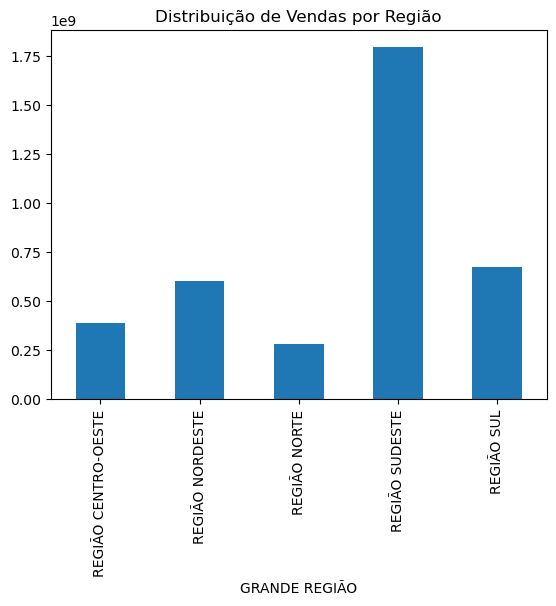

In [35]:
df.groupby('GRANDE REGIÃO')['VENDAS'].sum().plot(kind='bar', title='Distribuição de Vendas por Região')


### -Nota-se uma desigualdade na distribuição de vendas

<Axes: title={'center': 'Vendas por Combustível e Região'}, xlabel='GRANDE REGIÃO'>

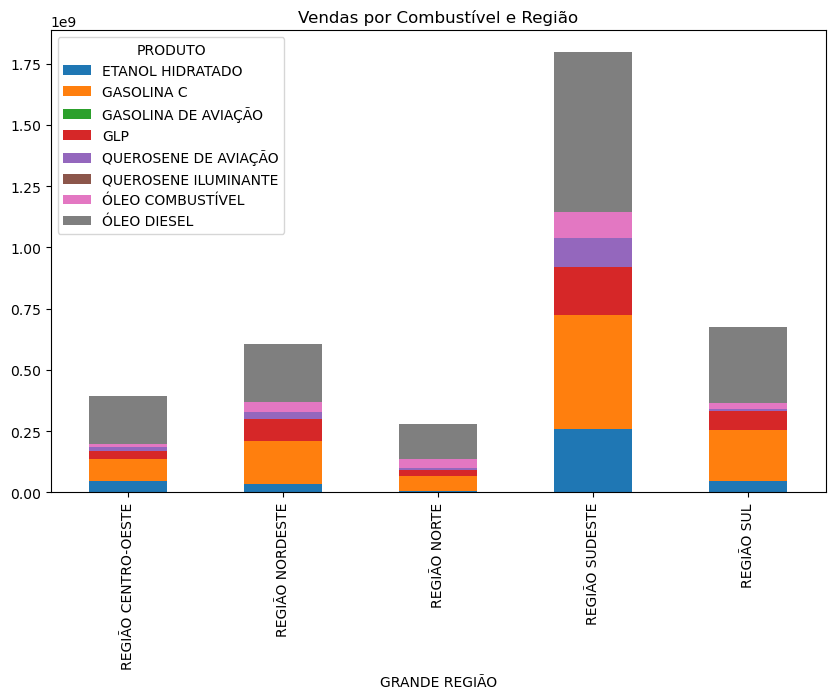

In [37]:
vendas_por_produto_regiao = df.groupby(['GRANDE REGIÃO', 'PRODUTO'])['VENDAS'].sum().unstack()
vendas_por_produto_regiao.plot(kind='bar', stacked=True, figsize=(10, 6), title='Vendas por Combustível e Região')


In [38]:
print(f'Colunas do DataFrame Original:\n\n{df.columns}')

Colunas do DataFrame Original:

Index(['ANO', 'MÊS', 'GRANDE REGIÃO', 'UNIDADE DA FEDERAÇÃO', 'PRODUTO',
       'VENDAS'],
      dtype='object')


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90072 entries, 0 to 90071
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ANO                   90072 non-null  int32  
 1   MÊS                   90072 non-null  object 
 2   GRANDE REGIÃO         90072 non-null  object 
 3   UNIDADE DA FEDERAÇÃO  90072 non-null  object 
 4   PRODUTO               90072 non-null  object 
 5   VENDAS                90072 non-null  float64
dtypes: float64(1), int32(1), object(4)
memory usage: 3.8+ MB


In [40]:
df.isnull().sum()

ANO                     0
MÊS                     0
GRANDE REGIÃO           0
UNIDADE DA FEDERAÇÃO    0
PRODUTO                 0
VENDAS                  0
dtype: int64

In [41]:
df.nunique()

ANO                        35
MÊS                        12
GRANDE REGIÃO               5
UNIDADE DA FEDERAÇÃO       27
PRODUTO                     8
VENDAS                  78740
dtype: int64

In [42]:
df.dtypes

ANO                       int32
MÊS                      object
GRANDE REGIÃO            object
UNIDADE DA FEDERAÇÃO     object
PRODUTO                  object
VENDAS                  float64
dtype: object

In [43]:
df.duplicated().sum()

0

In [44]:
produtos_unicos = df['PRODUTO'].unique()

print(produtos_unicos)


['ETANOL HIDRATADO' 'GASOLINA C' 'GASOLINA DE AVIAÇÃO' 'GLP'
 'QUEROSENE DE AVIAÇÃO' 'QUEROSENE ILUMINANTE' 'ÓLEO COMBUSTÍVEL'
 'ÓLEO DIESEL']


<h1 style="color:gray;">Contando a ocorrência de cada valor</h1>


In [46]:
conta_produtos = df['PRODUTO'].value_counts()
conta_produtos

PRODUTO
ETANOL HIDRATADO        11259
GASOLINA C              11259
GASOLINA DE AVIAÇÃO     11259
GLP                     11259
QUEROSENE DE AVIAÇÃO    11259
QUEROSENE ILUMINANTE    11259
ÓLEO COMBUSTÍVEL        11259
ÓLEO DIESEL             11259
Name: count, dtype: int64

In [47]:
conta_produtos = df['PRODUTO'].value_counts()
conta_produtos

PRODUTO
ETANOL HIDRATADO        11259
GASOLINA C              11259
GASOLINA DE AVIAÇÃO     11259
GLP                     11259
QUEROSENE DE AVIAÇÃO    11259
QUEROSENE ILUMINANTE    11259
ÓLEO COMBUSTÍVEL        11259
ÓLEO DIESEL             11259
Name: count, dtype: int64

In [48]:
conta_vendas = df['VENDAS'].value_counts()
conta_vendas

VENDAS
0.000         6605
10.000         273
5.000          249
15.000         213
20.000         165
              ... 
1762.316         1
1846.196         1
2196.345         1
1695.980         1
111733.400       1
Name: count, Length: 78740, dtype: int64

In [49]:
conta_ano = df['ANO'].value_counts()
conta_ano

ANO
1990    2592
2016    2592
2010    2592
2011    2592
2012    2592
2013    2592
2014    2592
2015    2592
2017    2592
2008    2592
2018    2592
2019    2592
2020    2592
2021    2592
2022    2592
2023    2592
2009    2592
2007    2592
1991    2592
1998    2592
1992    2592
1993    2592
1994    2592
1995    2592
1996    2592
1997    2592
1999    2592
2006    2592
2000    2592
2001    2592
2002    2592
2003    2592
2004    2592
2005    2592
2024    1944
Name: count, dtype: int64

### Legenda de Cores

Cada região será representada por uma cor:
| Dataframe       | Cor            | Amostra de Cor              |
|--------------|------------------ |-----------------------------|
| Original      | Cinza            | ![#808080](https://via.placeholder.com/15/808080/000000?text=+) |
| Sudeste       | Roxa             | ![#800080](https://via.placeholder.com/15/800080/000000?text=+) |
| Nordeste      | Laranja          | ![#FFA500](https://via.placeholder.com/15/FFA500/000000?text=+) |
| Norte            | Vermelho       | ![#FF0000](https://via.placeholder.com/15/FF0000/FF0000?text=+) |
| Centro-Oeste     | Amarelo        | ![#FFFF00](https://via.placeholder.com/15/FFFF00/FFFF00?text=+) |
| Sul              | Azul           | ![#0000FF](https://via.placeholder.com/15/0000FF/0000FF?text=+) |

<h1 style="color:gray;">Quebrando o Dataframe original por regiões</h1>
<ul style="color:gray;">
    <li>Como os dataframes fragmentados são parte de um todo, a análise exploratória é válida para seus fragmentos.</li>
</ul>


In [52]:
df_sudeste = df.loc[df['GRANDE REGIÃO'] == 'REGIÃO SUDESTE']
df_norte = df.loc[df['GRANDE REGIÃO'] == 'REGIÃO NORTE']
df_nordeste = df.loc[df['GRANDE REGIÃO'] == 'REGIÃO NORDESTE']
df_sul = df.loc[df['GRANDE REGIÃO'] == 'REGIÃO SUL']
df_centro_oeste = df.loc[df['GRANDE REGIÃO'] == 'REGIÃO CENTRO-OESTE']

<h1 style="color:purple;">Pré- processamento - Região Sudeste</h1>


In [54]:
media_vendas_sudeste = df_sudeste['VENDAS'].mean()

print(f"Média de vendas na Região Sudeste: {media_vendas_sudeste:.2f} m³")


Média de vendas na Região Sudeste: 134584.43 m³


In [55]:
df_sudeste

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
70,1990,JAN,REGIÃO SUDESTE,SÃO PAULO,ETANOL HIDRATADO,428709.796
81,1990,ABR,REGIÃO SUDESTE,MINAS GERAIS,ETANOL HIDRATADO,94384.290
82,1990,JUN,REGIÃO SUDESTE,MINAS GERAIS,ETANOL HIDRATADO,75867.971
93,1990,DEZ,REGIÃO SUDESTE,SÃO PAULO,ETANOL HIDRATADO,419651.950
94,1990,NOV,REGIÃO SUDESTE,SÃO PAULO,ETANOL HIDRATADO,485676.100
...,...,...,...,...,...,...
89943,2024,JUL,REGIÃO SUDESTE,MINAS GERAIS,ÓLEO DIESEL,788296.564
89944,2024,AGO,REGIÃO SUDESTE,MINAS GERAIS,ÓLEO DIESEL,778885.317
89945,2024,SET,REGIÃO SUDESTE,MINAS GERAIS,ÓLEO DIESEL,737505.601
89946,2024,SET,REGIÃO SUDESTE,SÃO PAULO,ÓLEO DIESEL,1187516.445


<h1 style="color:purple;">Explorando e entendendo a média de vendas total da Região Sudeste</h1>


<h1 style="color:purple;">Dividindo o DF Sudeste em categórico e numérico</h1>


In [58]:
df_categorico_sudeste = df_sudeste.select_dtypes(include=['object'])
df_numerico_sudeste = df_sudeste.select_dtypes(include=['number'])

<h1 style="color:purple;">Sudeste - Categórico</h1>


In [60]:
df_categorico_sudeste

,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO
70,JAN,REGIÃO SUDESTE,SÃO PAULO,ETANOL HIDRATADO
81,ABR,REGIÃO SUDESTE,MINAS GERAIS,ETANOL HIDRATADO
82,JUN,REGIÃO SUDESTE,MINAS GERAIS,ETANOL HIDRATADO
93,DEZ,REGIÃO SUDESTE,SÃO PAULO,ETANOL HIDRATADO
94,NOV,REGIÃO SUDESTE,SÃO PAULO,ETANOL HIDRATADO
...,...,...,...,...
89943,JUL,REGIÃO SUDESTE,MINAS GERAIS,ÓLEO DIESEL
89944,AGO,REGIÃO SUDESTE,MINAS GERAIS,ÓLEO DIESEL
89945,SET,REGIÃO SUDESTE,MINAS GERAIS,ÓLEO DIESEL
89946,SET,REGIÃO SUDESTE,SÃO PAULO,ÓLEO DIESEL


In [61]:
print(f'Sudeste  - Colunas do DataFrame Categórico:\n\n{df_categorico_sudeste.columns}')

Sudeste  - Colunas do DataFrame Categórico:

Index(['MÊS', 'GRANDE REGIÃO', 'UNIDADE DA FEDERAÇÃO', 'PRODUTO'], dtype='object')


<h1 style="color:purple;">Sudeste - Numérico</h1>


In [63]:
df_numerico_sudeste

,ANO,VENDAS
70,1990,428709.796
81,1990,94384.290
82,1990,75867.971
93,1990,419651.950
94,1990,485676.100
...,...,...
89943,2024,788296.564
89944,2024,778885.317
89945,2024,737505.601
89946,2024,1187516.445


In [64]:
print(f'Sudeste  - Colunas do DataFrame Numérico:\n\n{df_numerico_sudeste.columns}')

Sudeste  - Colunas do DataFrame Numérico:

Index(['ANO', 'VENDAS'], dtype='object')


<h1 style="color:purple;">Transformando variáveis categóricas</h1>


<h1 style="color:purple;">One-Hot Encoding para PRODUTO, GRANDE REGIÃO,UNIDADE DE FEDERAÇÃO, MÊS</h1>


In [67]:
# One-Hot Encoding para PRODUTO e outras categorias
df_sudeste = df_sudeste.drop(columns=["GRANDE REGIÃO"])

df_sudeste = pd.get_dummies(df_sudeste  , columns=['PRODUTO'], drop_first=False)
#df_sudeste = pd.get_dummies(df_sudeste , columns=['GRANDE REGIÃO'], drop_first=False)
df_sudeste = pd.get_dummies(df_sudeste , columns=['UNIDADE DA FEDERAÇÃO'], drop_first=False)
df_sudeste = pd.get_dummies(df_sudeste , columns=['MÊS'], drop_first=False)


In [68]:
df_sudeste

,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
70,1990,428709.796,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
81,1990,94384.290,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
82,1990,75867.971,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
93,1990,419651.950,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
94,1990,485676.100,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89943,2024,788296.564,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
89944,2024,778885.317,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
89945,2024,737505.601,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
89946,2024,1187516.445,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [69]:
print(f'Sudeste  - Colunas transformadas:\n\n{df_sudeste.columns}')

Sudeste  - Colunas transformadas:

Index(['ANO', 'VENDAS', 'PRODUTO_ETANOL HIDRATADO', 'PRODUTO_GASOLINA C',
       'PRODUTO_GASOLINA DE AVIAÇÃO', 'PRODUTO_GLP',
       'PRODUTO_QUEROSENE DE AVIAÇÃO', 'PRODUTO_QUEROSENE ILUMINANTE',
       'PRODUTO_ÓLEO COMBUSTÍVEL', 'PRODUTO_ÓLEO DIESEL',
       'UNIDADE DA FEDERAÇÃO_ESPÍRITO SANTO',
       'UNIDADE DA FEDERAÇÃO_MINAS GERAIS',
       'UNIDADE DA FEDERAÇÃO_RIO DE JANEIRO', 'UNIDADE DA FEDERAÇÃO_SÃO PAULO',
       'MÊS_ABR', 'MÊS_AGO', 'MÊS_DEZ', 'MÊS_FEV', 'MÊS_JAN', 'MÊS_JUL',
       'MÊS_JUN', 'MÊS_MAI', 'MÊS_MAR', 'MÊS_NOV', 'MÊS_OUT', 'MÊS_SET'],
      dtype='object')


In [70]:
df_sudeste

,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
70,1990,428709.796,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
81,1990,94384.290,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
82,1990,75867.971,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
93,1990,419651.950,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
94,1990,485676.100,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89943,2024,788296.564,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
89944,2024,778885.317,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
89945,2024,737505.601,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
89946,2024,1187516.445,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


<h1 style="color:purple;">Outliers</h1>


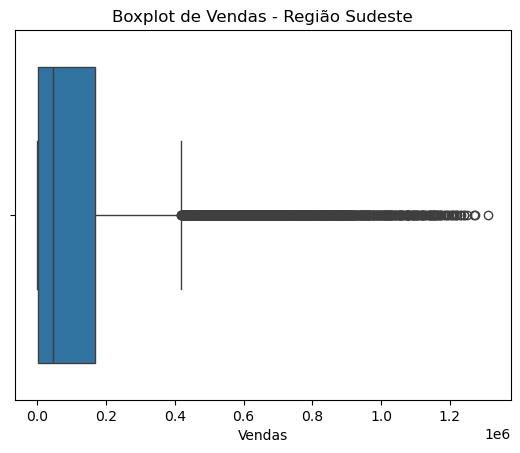

In [72]:
sns.boxplot(x=df_sudeste['VENDAS'])

plt.title('Boxplot de Vendas - Região Sudeste')
plt.xlabel('Vendas')
plt.show()


<h1 style="color:purple;">Removendo outliers utlizando o método IQR</h1>


In [74]:
#Remoção de Outliers

df_sudeste_sem_outliers = df_sudeste.copy()

Q1 = df['VENDAS'].quantile(0.25)  
Q3 = df['VENDAS'].quantile(0.75)  
IQR = Q3 - Q1 


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


df_sudeste_sem_outliers = df_sudeste_sem_outliers[
    (df_sudeste_sem_outliers['VENDAS'] >= limite_inferior) & 
    (df_sudeste_sem_outliers['VENDAS'] <= limite_superior)
]

# 
#print("Limite Inferior:", limite_inferior)
#print("Limite Superior:", limite_superior)



In [75]:
print("DataFrame sem outliers - Sudeste")
df_sudeste_sem_outliers #chamar df_sem_outliers caso precise

DataFrame sem outliers - Sudeste


,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
82,1990,75867.971,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
95,1990,15894.412,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
96,1990,14465.835,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
106,1990,19296.257,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
110,1990,77316.958,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89685,2024,10852.238,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
89738,2024,921.900,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
89742,2024,14323.215,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
89743,2024,2422.000,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False


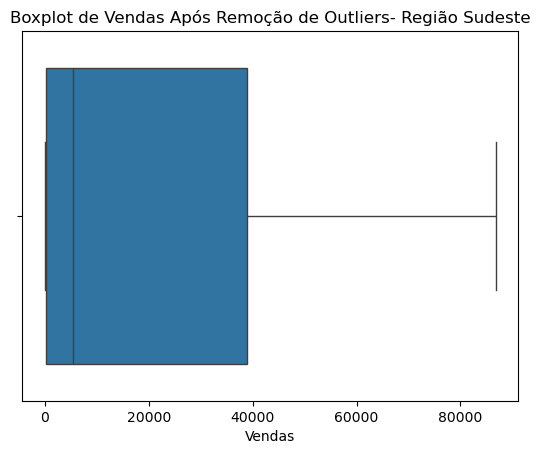

In [76]:
sns.boxplot(x=df_sudeste_sem_outliers['VENDAS'])

plt.title('Boxplot de Vendas Após Remoção de Outliers- Região Sudeste')
plt.xlabel('Vendas')
plt.show()


<h1 style="color:purple;"> Calcular a matriz de correlação (sem gráfico)</h1>


<h2 style="color:purple;">Sem outliers - Correlação</h2>


In [79]:
# Calcular a matriz de correlação SEM outliers
corr_matrix = df_sudeste_sem_outliers.corr()

print("Sudeste - Top 10 correlações com VENDAS (sem outliers):\n")
print(corr_matrix['VENDAS'].sort_values(ascending=False).head(10))

print("\nSudeste - Top 10 correlações negativas com VENDAS(sem outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).tail(10))


Sudeste - Top 10 correlações com VENDAS (sem outliers):

VENDAS                                 1.000000
PRODUTO_GLP                            0.325491
PRODUTO_ÓLEO DIESEL                    0.273362
UNIDADE DA FEDERAÇÃO_RIO DE JANEIRO    0.234099
PRODUTO_GASOLINA C                     0.230837
PRODUTO_ETANOL HIDRATADO               0.172300
PRODUTO_ÓLEO COMBUSTÍVEL               0.095214
PRODUTO_QUEROSENE DE AVIAÇÃO           0.034483
MÊS_JAN                                0.008018
MÊS_SET                                0.007901
Name: VENDAS, dtype: float64

Sudeste - Top 10 correlações negativas com VENDAS(sem outliers):
MÊS_AGO                               -0.007800
MÊS_JUN                               -0.008161
MÊS_JUL                               -0.010247
MÊS_DEZ                               -0.012171
UNIDADE DA FEDERAÇÃO_MINAS GERAIS     -0.030598
UNIDADE DA FEDERAÇÃO_ESPÍRITO SANTO   -0.076367
ANO                                   -0.119980
UNIDADE DA FEDERAÇÃO_SÃO PAULO  

<h2 style="color:purple;">Com outliers - Correlação</h2>


In [81]:
# Calcular a matriz de correlação Com outliers
corr_matrix = df_sudeste.corr()

print("Top 10 correlações com VENDAS (com outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).head(10))

print("\nTop 10 correlações negativas com VENDAS(com outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).tail(10))


Top 10 correlações com VENDAS (com outliers):
VENDAS                            1.000000
UNIDADE DA FEDERAÇÃO_SÃO PAULO    0.496852
PRODUTO_ÓLEO DIESEL               0.451501
PRODUTO_GASOLINA C                0.251292
ANO                               0.107559
PRODUTO_ETANOL HIDRATADO          0.038082
MÊS_AGO                           0.011946
MÊS_OUT                           0.009641
MÊS_JUL                           0.007089
MÊS_DEZ                           0.006191
Name: VENDAS, dtype: float64

Top 10 correlações negativas com VENDAS(com outliers):
MÊS_JAN                               -0.011856
MÊS_FEV                               -0.019950
UNIDADE DA FEDERAÇÃO_MINAS GERAIS     -0.028582
PRODUTO_GLP                           -0.029295
PRODUTO_QUEROSENE DE AVIAÇÃO          -0.113806
PRODUTO_ÓLEO COMBUSTÍVEL              -0.127106
UNIDADE DA FEDERAÇÃO_RIO DE JANEIRO   -0.166442
PRODUTO_QUEROSENE ILUMINANTE          -0.234809
PRODUTO_GASOLINA DE AVIAÇÃO           -0.235860
UNIDADE

<h2 style="color:purple;">Treinamento</h2>


In [83]:
media_vendas_sudeste_sem_outliers = df_sudeste_sem_outliers['VENDAS'].mean()

print(f"Média de vendas na Região Sudeste do DF sem outliers: {media_vendas_sudeste_sem_outliers:.2f} m³")


media_vendas_sudeste = df_sudeste['VENDAS'].mean()

print(f"Média de vendas na Região Sudeste do DF antes de remover outliers: {media_vendas_sudeste:.2f} m³")


Média de vendas na Região Sudeste do DF sem outliers: 21284.96 m³
Média de vendas na Região Sudeste do DF antes de remover outliers: 134584.43 m³


<h2 style="color:purple;">Regressão Linear</h2>
<p>underfitting</p>


In [85]:
%%time

# Variáveis com maior correlação
X = df_sudeste_sem_outliers[['PRODUTO_GLP', 
                             'PRODUTO_ÓLEO DIESEL', 
                             'UNIDADE DA FEDERAÇÃO_RIO DE JANEIRO', 
                             'PRODUTO_GASOLINA C',  
                             'PRODUTO_ETANOL HIDRATADO']]

y = df_sudeste_sem_outliers['VENDAS']

# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões no conjunto de teste
predicao_test = model.predict(X_test)

# Métricas para conjunto de teste
mse_test = mean_squared_error(y_test, predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, predicao_test)
r2_test = r2_score(y_test, predicao_test)

print("\nSudeste - Regressão Linear - Sem Outliers (Conjunto de Teste):\n")
print(f'Erro Quadrático Médio (MSE): {mse_test:.2f}')
print(f'Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}\n')

# Configuração para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(model, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Sudeste - Regressão Linear - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Média das vendas
vendas_mean = y.mean()

# Percentuais de erro em relação à média (Conjunto de Teste)
mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

# Percentuais de erro em relação à média (Validação Cruzada)
mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados
print(f"Métricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")



Sudeste - Regressão Linear - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 450318862.04
Coeficiente de Determinação (R²): 0.40 -> 40.21%
Root Mean Squared Error (RMSE): 21220.72
Mean Absolute Error (MAE): 16805.14

Sudeste - Regressão Linear - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 439668580.84
Root Mean Squared Error (RMSE): 20968.28
Mean Absolute Error (MAE): 16433.63
Coeficiente de Determinação (R²): 0.40 -> 40.08%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 10650281.20
Diferença de RMSE: 252.44
Diferença de MAE: 371.51
Diferença de R²: 0.00
Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 78.95%
Erro Relativo (RMSE/Média): 99.70%

Validação Cruzada:
Erro Relativo (MAE/Média): 77.21%
Erro Relativo (RMSE/Média): 98.51%

Tempo decorrido:
CPU times: total: 78.1 ms
Wall time: 224 ms


<h2 style="color:purple;">Árvore Decisão</h2>


In [87]:
%%time

# Separação de dados
X = df_sudeste_sem_outliers.drop(columns=['VENDAS'])
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
dtree = DecisionTreeRegressor(criterion='squared_error')
dtree.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_test = dtree.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nSudeste - Árvore de Decisão - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(dtree, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Performance na Validação Cruzada:")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()
vendas_median = y.median()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")



Sudeste - Árvore de Decisão - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 29413193.83
Root Mean Squared Error (RMSE): 5423.39
Mean Absolute Error (MAE): 2558.37
Coeficiente de Determinação (R²): 0.96 -> 96.05%

Performance na Validação Cruzada:
Erro Quadrático Médio (MSE): 27664554.40
Root Mean Squared Error (RMSE): 5259.71
Mean Absolute Error (MAE): 2449.71
Coeficiente de Determinação (R²): 0.96 -> 96.23%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 1748639.42
Diferença de RMSE: 163.68
Diferença de MAE: 108.66
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 12.02%
Erro Relativo (RMSE/Média): 25.48%

Validação Cruzada:
Erro Relativo (MAE/Média): 11.51%
Erro Relativo (RMSE/Média): 24.71%

Tempo decorrido:
CPU times: total: 594 ms
Wall time: 859 ms


<h1 style="color:purple;">Floresta Aleatória</h1>


In [89]:
%%time

# Separação de dados
X = df_sudeste_sem_outliers.drop(columns=['VENDAS'])
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Previsões no conjunto de teste
rfc_predicao_test = rfc.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, rfc_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, rfc_predicao_test)
r2_test = r2_score(y_test, rfc_predicao_test)

print(f"Sudeste - Floresta Aleatória - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(rfc, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Sudeste - Floresta Aleatória - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()
vendas_median = y.median()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Sudeste - Floresta Aleatória - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 19502362.09
Root Mean Squared Error (RMSE): 4416.15
Mean Absolute Error (MAE): 2062.56
Coeficiente de Determinação (R²): 0.97 -> 97.38%

Sudeste - Floresta Aleatória - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 18794828.34
Root Mean Squared Error (RMSE): 4335.30
Mean Absolute Error (MAE): 2025.44
Coeficiente de Determinação (R²): 0.97 -> 97.44%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 707533.75
Diferença de RMSE: 80.85
Diferença de MAE: 37.12
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 9.69%
Erro Relativo (RMSE/Média): 20.75%

Validação Cruzada:
Erro Relativo (MAE/Média): 9.52%
Erro Relativo (RMSE/Média): 20.37%

Tempo decorrido:
CPU times: total: 16.6 s
Wall time: 20.9 s


<h1 style="color:purple;">Gradient Boosting Regressor</h1>
<p style="color:black;">Os parâmetros do modelo foram ajustados para <strong>n_estimators=200</strong> e <strong>max_depth=6</strong>, a fim de alcançar uma melhor performance, reduzindo os erros de previsão e aumentando a precisão do modelo.</p>


In [91]:
%%time
# Gradient Boosting Regressor
X = df_sudeste_sem_outliers.drop(columns=['VENDAS'])
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
gbr.fit(X_train, y_train)

# Previsões no conjunto de teste
gbr_predicao_test = gbr.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, gbr_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, gbr_predicao_test)
r2_test = r2_score(y_test, gbr_predicao_test)

print(f"Sudeste - Gradient Boosting - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(gbr, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Sudeste - Gradient Boosting - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Sudeste - Gradient Boosting - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 18530037.68
Root Mean Squared Error (RMSE): 4304.65
Mean Absolute Error (MAE): 2308.75
Coeficiente de Determinação (R²): 0.98 -> 97.51%

Sudeste - Gradient Boosting - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 17559049.78
Root Mean Squared Error (RMSE): 4190.35
Mean Absolute Error (MAE): 2222.04
Coeficiente de Determinação (R²): 0.98 -> 97.60%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 970987.90
Diferença de RMSE: 114.30
Diferença de MAE: 86.71
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 10.85%
Erro Relativo (RMSE/Média): 20.22%

Validação Cruzada:
Erro Relativo (MAE/Média): 10.44%
Erro Relativo (RMSE/Média): 19.69%

Tempo decorrido:
CPU times: total: 28.7 s
Wall time: 33.6 s


<h1 style="color:purple;">Ada Boost</h1>
<p style="color:black;">
O AdaBoost, por padrão, usa árvores de decisão bem simples, com profundidade máxima (<strong>max_depth</strong>) de apenas <strong>1</strong>. Isso acaba sendo um problema para o nosso dataset, porque ele não consegue capturar padrões mais complexos. Para melhorar, seria necessário ajustar o modelo base, mas mesmo assim o AdaBoost pode não ser a melhor escolha para esse caso causando underfitting.</p>


In [93]:
%%time
# Separação de dados
X = df_sudeste_sem_outliers.drop(columns=['VENDAS'])
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
adaboost = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)

# Previsões no conjunto de teste
adaboost_predicao_test = adaboost.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, adaboost_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, adaboost_predicao_test)
r2_test = r2_score(y_test, adaboost_predicao_test)

print(f"Sudeste - AdaBoost - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(adaboost, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Sudeste - AdaBoost - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Sudeste - AdaBoost - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 363443440.19
Root Mean Squared Error (RMSE): 19064.19
Mean Absolute Error (MAE): 13189.38
Coeficiente de Determinação (R²): 0.51 -> 51.14%

Sudeste - AdaBoost - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 363904716.17
Root Mean Squared Error (RMSE): 19076.29
Mean Absolute Error (MAE): 13100.22
Coeficiente de Determinação (R²): 0.50 -> 50.33%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 461275.97
Diferença de RMSE: 12.09
Diferença de MAE: 89.16
Diferença de R²: 0.01

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 61.97%
Erro Relativo (RMSE/Média): 89.57%

Validação Cruzada:
Erro Relativo (MAE/Média): 61.55%
Erro Relativo (RMSE/Média): 89.62%

Tempo decorrido:
CPU times: total: 10.8 s
Wall time: 13.4 s


<h1 style="color:purple;">Bagging Regressor</h1>


In [95]:
%%time
# Separação de dados
X = df_sudeste_sem_outliers.drop(columns=['VENDAS'])
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(criterion='squared_error'), 
                           n_estimators=100, 
                           random_state=42)
bagging.fit(X_train, y_train)

# Previsões no conjunto de teste
bagging_predicao_test = bagging.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, bagging_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, bagging_predicao_test)
r2_test = r2_score(y_test, bagging_predicao_test)

print(f"Sudeste - Bagging Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(bagging, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Sudeste - Bagging Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Sudeste - Bagging Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 19523860.82
Root Mean Squared Error (RMSE): 4418.58
Mean Absolute Error (MAE): 2064.47
Coeficiente de Determinação (R²): 0.97 -> 97.38%

Sudeste - Bagging Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 18483840.65
Root Mean Squared Error (RMSE): 4299.28
Mean Absolute Error (MAE): 2000.52
Coeficiente de Determinação (R²): 0.97 -> 97.48%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 1040020.18
Diferença de RMSE: 119.30
Diferença de MAE: 63.96
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 9.70%
Erro Relativo (RMSE/Média): 20.76%

Validação Cruzada:
Erro Relativo (MAE/Média): 9.40%
Erro Relativo (RMSE/Média): 20.20%

Tempo decorrido:
CPU times: total: 34.8 s
Wall time: 39.9 s


<h1 style="color:purple;">KNN</h1>


In [97]:
%%time
# KNN Regressor
X = df_sudeste_sem_outliers.drop(columns=['VENDAS'])
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Usando 5 vizinhos como padrão
knn_regressor.fit(X_train, y_train)

# Previsões no conjunto de teste
predicao_test = knn_regressor.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, predicao_test)
r2_test = r2_score(y_test, predicao_test)

print(f"Região Sudeste - KNN Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(knn_regressor, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Região Sudeste - KNN Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Região Sudeste - KNN Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 139080342.87
Root Mean Squared Error (RMSE): 11793.23
Mean Absolute Error (MAE): 7632.90
Coeficiente de Determinação (R²): 0.81 -> 81.30%

Região Sudeste - KNN Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 120891225.77
Root Mean Squared Error (RMSE): 10995.05
Mean Absolute Error (MAE): 6717.98
Coeficiente de Determinação (R²): 0.84 -> 83.52%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 18189117.10
Diferença de RMSE: 798.18
Diferença de MAE: 914.93
Diferença de R²: 0.02

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 35.86%
Erro Relativo (RMSE/Média): 55.41%

Validação Cruzada:
Erro Relativo (MAE/Média): 31.56%
Erro Relativo (RMSE/Média): 51.66%

Tempo decorrido:
CPU times: total: 3.28 s
Wall time: 2.8 s


<h1 style="color:purple;">Stacking</h1>


In [ ]:
%%time

# Separação de dados
X = df_sudeste_sem_outliers.drop(columns=['VENDAS'])
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelos base
bases = [
    ('dt', DecisionTreeRegressor(criterion='squared_error', random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=200, random_state=42))
]

meta_model = LinearRegression()

stacking = StackingRegressor(estimators=bases, final_estimator=meta_model)
stacking.fit(X_train, y_train)

stacking_predicao_test = stacking.predict(X_test)

mse_test = mean_squared_error(y_test, stacking_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, stacking_predicao_test)
r2_test = r2_score(y_test, stacking_predicao_test)

print(f"Sudeste - Stacking Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(stacking, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Sudeste - Stacking Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Sudeste - Stacking Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 19009681.28
Root Mean Squared Error (RMSE): 4360.01
Mean Absolute Error (MAE): 2076.57
Coeficiente de Determinação (R²): 0.97 -> 97.44%



<h1 style="color:orange;">Pré- processamento - Região Nordeste</h1>


In [101]:
media_vendas_nordeste = df_nordeste['VENDAS'].mean()

print(f"Média de vendas na Região Nordeste: {media_vendas_nordeste:.2f} m³")


Média de vendas na Região Nordeste: 20155.02 m³


In [102]:
df_nordeste

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
23,1990,ABR,REGIÃO NORDESTE,SERGIPE,ETANOL HIDRATADO,7883.797
47,1990,MAI,REGIÃO NORDESTE,SERGIPE,ETANOL HIDRATADO,5087.710
48,1990,MAR,REGIÃO NORDESTE,SERGIPE,ETANOL HIDRATADO,5169.931
98,1990,MAR,REGIÃO NORDESTE,BAHIA,ETANOL HIDRATADO,35098.275
120,1990,NOV,REGIÃO NORDESTE,BAHIA,ETANOL HIDRATADO,51628.862
...,...,...,...,...,...,...
90034,2024,MAR,REGIÃO NORDESTE,ALAGOAS,ÓLEO DIESEL,35175.500
90035,2024,ABR,REGIÃO NORDESTE,ALAGOAS,ÓLEO DIESEL,33086.272
90036,2024,MAI,REGIÃO NORDESTE,ALAGOAS,ÓLEO DIESEL,31709.000
90037,2024,JUN,REGIÃO NORDESTE,ALAGOAS,ÓLEO DIESEL,27789.910


<h1 style="color:orange;">Dividindo o DF Nordeste em categórico e numérico</h1>


In [104]:
df_categorico_nordeste = df_nordeste.select_dtypes(include=['object'])
df_numerico_nordeste= df_nordeste.select_dtypes(include=['number'])

<h1 style="color:orange;">Nordeste - Categórico</h1>


In [106]:
df_categorico_nordeste

,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO
23,ABR,REGIÃO NORDESTE,SERGIPE,ETANOL HIDRATADO
47,MAI,REGIÃO NORDESTE,SERGIPE,ETANOL HIDRATADO
48,MAR,REGIÃO NORDESTE,SERGIPE,ETANOL HIDRATADO
98,MAR,REGIÃO NORDESTE,BAHIA,ETANOL HIDRATADO
120,NOV,REGIÃO NORDESTE,BAHIA,ETANOL HIDRATADO
...,...,...,...,...
90034,MAR,REGIÃO NORDESTE,ALAGOAS,ÓLEO DIESEL
90035,ABR,REGIÃO NORDESTE,ALAGOAS,ÓLEO DIESEL
90036,MAI,REGIÃO NORDESTE,ALAGOAS,ÓLEO DIESEL
90037,JUN,REGIÃO NORDESTE,ALAGOAS,ÓLEO DIESEL


In [107]:
print(f'Nordeste  - Colunas do DataFrame Categórico:\n\n{df_categorico_nordeste.columns}')

Nordeste  - Colunas do DataFrame Categórico:

Index(['MÊS', 'GRANDE REGIÃO', 'UNIDADE DA FEDERAÇÃO', 'PRODUTO'], dtype='object')


<h1 style="color:orange;">Nordeste - Numérico</h1>


In [109]:
df_numerico_nordeste

,ANO,VENDAS
23,1990,7883.797
47,1990,5087.710
48,1990,5169.931
98,1990,35098.275
120,1990,51628.862
...,...,...
90034,2024,35175.500
90035,2024,33086.272
90036,2024,31709.000
90037,2024,27789.910


In [110]:
print(f'Nordeste  - Colunas do DataFrame Numérico:\n\n{df_numerico_nordeste.columns}')

Nordeste  - Colunas do DataFrame Numérico:

Index(['ANO', 'VENDAS'], dtype='object')


<h1 style="color:orange;">Transformando variáveis categóricas</h1>


<h1 style="color:orange;">One-Hot Encoding para PRODUTO, GRANDE REGIÃO,UNIDADE DE FEDERAÇÃO, MÊS</h1>


In [113]:
# One-Hot Encoding para PRODUTO e outras categorias
df_nordeste = df_nordeste.drop(columns=["GRANDE REGIÃO"])

df_nordeste = pd.get_dummies(df_nordeste  , columns=['PRODUTO'], drop_first=False)
#df_nordeste = pd.get_dummies(df_nordestee , columns=['GRANDE REGIÃO'], drop_first=False)
df_nordeste = pd.get_dummies(df_nordeste , columns=['UNIDADE DA FEDERAÇÃO'], drop_first=False)
df_nordeste = pd.get_dummies(df_nordeste , columns=['MÊS'], drop_first=False)

In [114]:
df_nordeste

,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
23,1990,7883.797,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47,1990,5087.710,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
48,1990,5169.931,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
98,1990,35098.275,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
120,1990,51628.862,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90034,2024,35175.500,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
90035,2024,33086.272,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
90036,2024,31709.000,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
90037,2024,27789.910,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [115]:
print(f'Nordeste  - Colunas transformadas:\n\n{df_nordeste.columns}')

Nordeste  - Colunas transformadas:

Index(['ANO', 'VENDAS', 'PRODUTO_ETANOL HIDRATADO', 'PRODUTO_GASOLINA C',
       'PRODUTO_GASOLINA DE AVIAÇÃO', 'PRODUTO_GLP',
       'PRODUTO_QUEROSENE DE AVIAÇÃO', 'PRODUTO_QUEROSENE ILUMINANTE',
       'PRODUTO_ÓLEO COMBUSTÍVEL', 'PRODUTO_ÓLEO DIESEL',
       'UNIDADE DA FEDERAÇÃO_ALAGOAS', 'UNIDADE DA FEDERAÇÃO_BAHIA',
       'UNIDADE DA FEDERAÇÃO_CEARÁ', 'UNIDADE DA FEDERAÇÃO_MARANHÃO',
       'UNIDADE DA FEDERAÇÃO_PARAÍBA', 'UNIDADE DA FEDERAÇÃO_PERNAMBUCO',
       'UNIDADE DA FEDERAÇÃO_PIAUÍ',
       'UNIDADE DA FEDERAÇÃO_RIO GRANDE DO NORTE',
       'UNIDADE DA FEDERAÇÃO_SERGIPE', 'MÊS_ABR', 'MÊS_AGO', 'MÊS_DEZ',
       'MÊS_FEV', 'MÊS_JAN', 'MÊS_JUL', 'MÊS_JUN', 'MÊS_MAI', 'MÊS_MAR',
       'MÊS_NOV', 'MÊS_OUT', 'MÊS_SET'],
      dtype='object')


<h1 style="color:orange;">Outliers</h1>


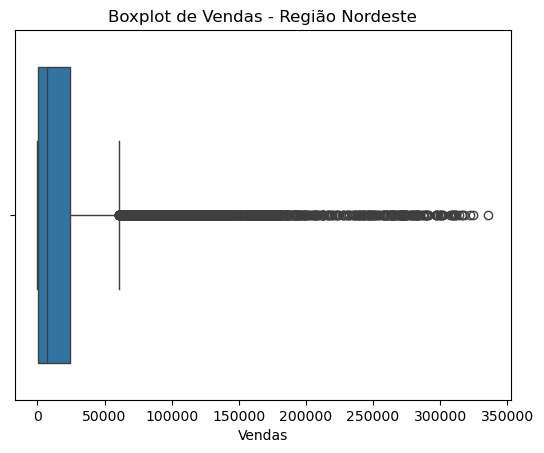

In [117]:
sns.boxplot(x=df_nordeste['VENDAS'])

plt.title('Boxplot de Vendas - Região Nordeste')
plt.xlabel('Vendas')
plt.show()


<h1 style="color:orange;">Removendo outliers utlizando o método IQR</h1>


In [119]:
#Remoção de Outliers

df_nordeste_sem_outliers = df_nordeste.copy()

Q1 = df['VENDAS'].quantile(0.25)  
Q3 = df['VENDAS'].quantile(0.75)  
IQR = Q3 - Q1 


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


df_nordeste_sem_outliers = df_nordeste_sem_outliers[
    (df_nordeste_sem_outliers['VENDAS'] >= limite_inferior) & 
    (df_nordeste_sem_outliers['VENDAS'] <= limite_superior)
]

# 
#print("Limite Inferior:", limite_inferior)
#print("Limite Superior:", limite_superior)



In [120]:
print("DataFrame sem outliers - Nordeste")
df_nordeste_sem_outliers #chamar df_sem_outliers caso precise

DataFrame sem outliers - Nordeste


,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
23,1990,7883.797,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47,1990,5087.710,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
48,1990,5169.931,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
98,1990,35098.275,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
120,1990,51628.862,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90008,2024,38525.788,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
90034,2024,35175.500,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
90035,2024,33086.272,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
90036,2024,31709.000,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


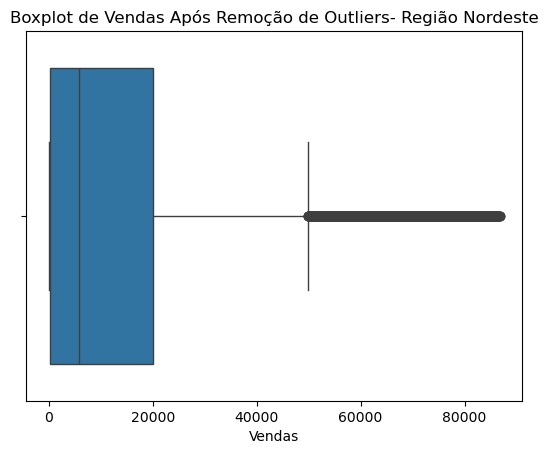

In [121]:
sns.boxplot(x=df_nordeste_sem_outliers['VENDAS'])

plt.title('Boxplot de Vendas Após Remoção de Outliers- Região Nordeste')
plt.xlabel('Vendas')
plt.show()


<h1 style="color:orange;"> Calcular a matriz de correlação (sem gráfico)</h1>


<h2 style="color:orange;">Sem outliers - Correlação</h2>


In [124]:
# Calcular a matriz de correlação SEM outliers
corr_matrix = df_nordeste_sem_outliers.corr()

print("Nordeste - Top 10 correlações com VENDAS (sem outliers):\n")
print(corr_matrix['VENDAS'].sort_values(ascending=False).head(10))

print("\nNordeste - Top 10 correlações negativas com VENDAS(sem outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).tail(10))


Nordeste - Top 10 correlações com VENDAS (sem outliers):

VENDAS                             1.000000
PRODUTO_ÓLEO DIESEL                0.394997
PRODUTO_GASOLINA C                 0.356973
UNIDADE DA FEDERAÇÃO_BAHIA         0.238015
PRODUTO_GLP                        0.222259
UNIDADE DA FEDERAÇÃO_PERNAMBUCO    0.129631
ANO                                0.104485
UNIDADE DA FEDERAÇÃO_CEARÁ         0.052823
UNIDADE DA FEDERAÇÃO_MARANHÃO      0.027725
MÊS_DEZ                            0.010499
Name: VENDAS, dtype: float64

Nordeste - Top 10 correlações negativas com VENDAS(sem outliers):
UNIDADE DA FEDERAÇÃO_PARAÍBA               -0.034084
UNIDADE DA FEDERAÇÃO_RIO GRANDE DO NORTE   -0.054863
PRODUTO_ÓLEO COMBUSTÍVEL                   -0.084146
UNIDADE DA FEDERAÇÃO_PIAUÍ                 -0.094694
PRODUTO_ETANOL HIDRATADO                   -0.100976
UNIDADE DA FEDERAÇÃO_ALAGOAS               -0.103119
UNIDADE DA FEDERAÇÃO_SERGIPE               -0.131541
PRODUTO_QUEROSENE DE AVIAÇÃO       

<h2 style="color:orange;">Com outliers - Correlação</h2>


In [126]:
# Calcular a matriz de correlação SEM outliers
corr_matrix = df_nordeste.corr()

print("Top 10 correlações com VENDAS (com outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).head(10))

print("\nTop 10 correlações negativas com VENDAS(com outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).tail(10))


Top 10 correlações com VENDAS (com outliers):
VENDAS                             1.000000
PRODUTO_ÓLEO DIESEL                0.461005
UNIDADE DA FEDERAÇÃO_BAHIA         0.374662
PRODUTO_GASOLINA C                 0.282090
ANO                                0.180187
UNIDADE DA FEDERAÇÃO_PERNAMBUCO    0.109662
PRODUTO_GLP                        0.048072
UNIDADE DA FEDERAÇÃO_CEARÁ         0.032735
MÊS_DEZ                            0.014011
MÊS_OUT                            0.008926
Name: VENDAS, dtype: float64

Top 10 correlações negativas com VENDAS(com outliers):
UNIDADE DA FEDERAÇÃO_PARAÍBA               -0.079537
UNIDADE DA FEDERAÇÃO_RIO GRANDE DO NORTE   -0.090200
PRODUTO_ÓLEO COMBUSTÍVEL                   -0.102624
UNIDADE DA FEDERAÇÃO_PIAUÍ                 -0.110639
UNIDADE DA FEDERAÇÃO_ALAGOAS               -0.114963
PRODUTO_ETANOL HIDRATADO                   -0.118124
UNIDADE DA FEDERAÇÃO_SERGIPE               -0.129548
PRODUTO_QUEROSENE DE AVIAÇÃO               -0.140740
PRODU

In [127]:
media_vendas_nordeste_sem_outliers = df_nordeste_sem_outliers['VENDAS'].mean()

print(f"Média de vendas na Região Nordeste do DF sem outliers: {media_vendas_nordeste_sem_outliers:.2f} m³")


media_vendas_nordeste = df_nordeste['VENDAS'].mean()

print(f"Média de vendas na Região Nordeste do DF antes de remover outliers: {media_vendas_nordeste:.2f} m³")


Média de vendas na Região Nordeste do DF sem outliers: 13964.88 m³
Média de vendas na Região Nordeste do DF antes de remover outliers: 20155.02 m³


<h2 style="color:orange;">Treinamento</h2>


<h2 style="color:orange;">Regressão Linear</h2>


In [130]:
%%time

# Variáveis com maior correlação - Nordeste 
#PRODUTO_ÓLEO DIESEL                0.394997
#PRODUTO_GASOLINA C                 0.356973
#UNIDADE DA FEDERAÇÃO_BAHIA         0.238015
#PRODUTO_GLP                        0.222259

X = df_nordeste_sem_outliers[['PRODUTO_ÓLEO DIESEL', 
        'PRODUTO_GASOLINA C', 
        'UNIDADE DA FEDERAÇÃO_BAHIA', 
        'PRODUTO_GLP']]  


y = df_nordeste_sem_outliers['VENDAS']

# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões no conjunto de teste
predicao_test = model.predict(X_test)

# Métricas para conjunto de teste
mse_test = mean_squared_error(y_test, predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, predicao_test)
r2_test = r2_score(y_test, predicao_test)

print("\nNordeste- Regressão Linear - Sem Outliers (Conjunto de Teste):\n")
print(f'Erro Quadrático Médio (MSE): {mse_test:.2f}')
print(f'Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}\n')

# Configuração para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(model, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Nordeste - Regressão Linear - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Média das vendas
vendas_mean = y.mean()

# Percentuais de erro em relação à média (Conjunto de Teste)
mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

# Percentuais de erro em relação à média (Validação Cruzada)
mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados
print(f"Métricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")





Nordeste- Regressão Linear - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 164342000.56
Coeficiente de Determinação (R²): 0.54 -> 53.56%
Root Mean Squared Error (RMSE): 12819.59
Mean Absolute Error (MAE): 8574.87

Nordeste - Regressão Linear - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 162701315.94
Root Mean Squared Error (RMSE): 12755.44
Mean Absolute Error (MAE): 8559.03
Coeficiente de Determinação (R²): 0.53 -> 52.98%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 1640684.62
Diferença de RMSE: 64.15
Diferença de MAE: 15.84
Diferença de R²: 0.01
Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 61.40%
Erro Relativo (RMSE/Média): 91.80%

Validação Cruzada:
Erro Relativo (MAE/Média): 61.29%
Erro Relativo (RMSE/Média): 91.34%

Tempo decorrido:
CPU times: total: 141 ms
Wall time: 89.6 ms


<h2 style="color:orange;">Árvore Decisão</h2>


In [132]:
%%time

# Separação de dados
X = df_nordeste_sem_outliers.drop(columns=['VENDAS'])
y = df_nordeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
dtree = DecisionTreeRegressor(criterion='squared_error')
dtree.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_test = dtree.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nNordeste - Árvore de Decisão - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(dtree, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Performance na Validação Cruzada:")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()
vendas_median = y.median()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")



Nordeste - Árvore de Decisão - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 15627869.71
Root Mean Squared Error (RMSE): 3953.21
Mean Absolute Error (MAE): 1549.40
Coeficiente de Determinação (R²): 0.95 -> 95.48%

Performance na Validação Cruzada:
Erro Quadrático Médio (MSE): 16058757.90
Root Mean Squared Error (RMSE): 4007.34
Mean Absolute Error (MAE): 1501.76
Coeficiente de Determinação (R²): 0.95 -> 95.36%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 430888.19
Diferença de RMSE: 54.13
Diferença de MAE: 47.64
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 11.09%
Erro Relativo (RMSE/Média): 28.31%

Validação Cruzada:
Erro Relativo (MAE/Média): 10.75%
Erro Relativo (RMSE/Média): 28.70%

Tempo decorrido:
CPU times: total: 2.08 s
Wall time: 2.96 s


<h2 style="color:orange;">Floresta Aleatória</h2>


In [134]:
%%time

# Separação de dados
X = df_nordeste_sem_outliers.drop(columns=['VENDAS'])
y = df_nordeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Previsões no conjunto de teste
rfc_predicao_test = rfc.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, rfc_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, rfc_predicao_test)
r2_test = r2_score(y_test, rfc_predicao_test)

print(f"Nordeste - Floresta Aleatória - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(rfc, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Nordeste - Floresta Aleatória - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()
vendas_median = y.median()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Nordeste - Floresta Aleatória - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 9612409.84
Root Mean Squared Error (RMSE): 3100.39
Mean Absolute Error (MAE): 1233.21
Coeficiente de Determinação (R²): 0.97 -> 97.22%

Nordeste - Floresta Aleatória - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 9837864.47
Root Mean Squared Error (RMSE): 3136.54
Mean Absolute Error (MAE): 1221.96
Coeficiente de Determinação (R²): 0.97 -> 97.16%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 225454.63
Diferença de RMSE: 36.15
Diferença de MAE: 11.25
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 8.83%
Erro Relativo (RMSE/Média): 22.20%

Validação Cruzada:
Erro Relativo (MAE/Média): 8.75%
Erro Relativo (RMSE/Média): 22.46%

Tempo decorrido:
CPU times: total: 1min 2s
Wall time: 1min 13s


<h1 style="color:orange;">Gradient Boosting Regressor</h1>


In [136]:
%%time
# Gradient Boosting Regressor
X = df_nordeste_sem_outliers.drop(columns=['VENDAS'])
y = df_nordeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
gbr.fit(X_train, y_train)

# Previsões no conjunto de teste
gbr_predicao_test = gbr.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, gbr_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, gbr_predicao_test)
r2_test = r2_score(y_test, gbr_predicao_test)

print(f"Nordeste - Gradient Boosting - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(gbr, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Nordeste - Gradient Boosting - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Nordeste - Gradient Boosting - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 9563575.51
Root Mean Squared Error (RMSE): 3092.50
Mean Absolute Error (MAE): 1489.43
Coeficiente de Determinação (R²): 0.97 -> 97.24%

Nordeste - Gradient Boosting - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 9218185.63
Root Mean Squared Error (RMSE): 3036.15
Mean Absolute Error (MAE): 1461.24
Coeficiente de Determinação (R²): 0.97 -> 97.34%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 345389.88
Diferença de RMSE: 56.36
Diferença de MAE: 28.18
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 10.67%
Erro Relativo (RMSE/Média): 22.14%

Validação Cruzada:
Erro Relativo (MAE/Média): 10.46%
Erro Relativo (RMSE/Média): 21.74%

Tempo decorrido:
CPU times: total: 1min 41s
Wall time: 2min 3s


<h1 style="color:orange;">Ada Boost</h1>


In [138]:
%%time
# Separação de dados
X = df_nordeste_sem_outliers.drop(columns=['VENDAS'])
y = df_nordeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
adaboost = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)

# Previsões no conjunto de teste
adaboost_predicao_test = adaboost.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, adaboost_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, adaboost_predicao_test)
r2_test = r2_score(y_test, adaboost_predicao_test)

print(f"Nordeste - AdaBoost - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(adaboost, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Nordeste - AdaBoost - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Nordeste - AdaBoost - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 143007805.94
Root Mean Squared Error (RMSE): 11958.59
Mean Absolute Error (MAE): 9508.15
Coeficiente de Determinação (R²): 0.59 -> 58.66%

Nordeste - AdaBoost - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 140973008.55
Root Mean Squared Error (RMSE): 11873.21
Mean Absolute Error (MAE): 9603.32
Coeficiente de Determinação (R²): 0.59 -> 59.25%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 2034797.40
Diferença de RMSE: 85.38
Diferença de MAE: 95.17
Diferença de R²: 0.01

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 68.09%
Erro Relativo (RMSE/Média): 85.63%

Validação Cruzada:
Erro Relativo (MAE/Média): 68.77%
Erro Relativo (RMSE/Média): 85.02%

Tempo decorrido:
CPU times: total: 49 s
Wall time: 56.1 s


<h1 style="color:orange;">Bagging Regressor</h1>


In [140]:
%%time
# Separação de dados
X = df_nordeste_sem_outliers.drop(columns=['VENDAS'])
y = df_nordeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(criterion='squared_error'), 
                           n_estimators=100, 
                           random_state=42)
bagging.fit(X_train, y_train)

# Previsões no conjunto de teste
bagging_predicao_test = bagging.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, bagging_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, bagging_predicao_test)
r2_test = r2_score(y_test, bagging_predicao_test)

print(f"Nordeste - Bagging Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(bagging, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Nordeste - Bagging Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Nordeste - Bagging Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 9602956.31
Root Mean Squared Error (RMSE): 3098.86
Mean Absolute Error (MAE): 1232.92
Coeficiente de Determinação (R²): 0.97 -> 97.22%

Nordeste - Bagging Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 10058409.08
Root Mean Squared Error (RMSE): 3171.50
Mean Absolute Error (MAE): 1213.28
Coeficiente de Determinação (R²): 0.97 -> 97.10%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 455452.77
Diferença de RMSE: 72.64
Diferença de MAE: 19.64
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 8.83%
Erro Relativo (RMSE/Média): 22.19%

Validação Cruzada:
Erro Relativo (MAE/Média): 8.69%
Erro Relativo (RMSE/Média): 22.71%

Tempo decorrido:
CPU times: total: 2min 11s
Wall time: 2min 33s


<h1 style="color:orange;">KNN</h1>


In [142]:
%%time
# KNN Regressor
X = df_nordeste_sem_outliers.drop(columns=['VENDAS'])
y = df_nordeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Usando 5 vizinhos como padrão
knn_regressor.fit(X_train, y_train)

# Previsões no conjunto de teste
predicao_test = knn_regressor.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, predicao_test)
r2_test = r2_score(y_test, predicao_test)

print(f"Região Nordeste - KNN Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(knn_regressor, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Região Nordeste - KNN Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Região Nordeste - KNN Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 73569675.29
Root Mean Squared Error (RMSE): 8577.28
Mean Absolute Error (MAE): 5328.22
Coeficiente de Determinação (R²): 0.79 -> 78.73%

Região Nordeste - KNN Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 63163082.74
Root Mean Squared Error (RMSE): 7947.52
Mean Absolute Error (MAE): 4708.53
Coeficiente de Determinação (R²): 0.82 -> 81.75%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 10406592.54
Diferença de RMSE: 629.76
Diferença de MAE: 619.69
Diferença de R²: 0.03

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 38.15%
Erro Relativo (RMSE/Média): 61.42%

Validação Cruzada:
Erro Relativo (MAE/Média): 33.72%
Erro Relativo (RMSE/Média): 56.91%

Tempo decorrido:
CPU times: total: 27.9 s
Wall time: 27.9 s


<h1 style="color:orange;">Stacking</h1>


In [144]:
%%time

# Separação de dados
X = df_nordeste_sem_outliers.drop(columns=['VENDAS'])
y = df_nordeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bases = [
    ('dt', DecisionTreeRegressor(criterion='squared_error', random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=200, random_state=42))
]

meta_model = LinearRegression()

stacking = StackingRegressor(estimators=bases, final_estimator=meta_model)
stacking.fit(X_train, y_train)

stacking_predicao_test = stacking.predict(X_test)

mse_test = mean_squared_error(y_test, stacking_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, stacking_predicao_test)
r2_test = r2_score(y_test, stacking_predicao_test)

print(f"Nordeste - Stacking Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(stacking, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Nordeste - Stacking Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Nordeste - Stacking Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 9518239.19
Root Mean Squared Error (RMSE): 3085.16
Mean Absolute Error (MAE): 1305.54
Coeficiente de Determinação (R²): 0.97 -> 97.25%

Nordeste - Stacking Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 10320085.88
Root Mean Squared Error (RMSE): 3212.49
Mean Absolute Error (MAE): 1471.96
Coeficiente de Determinação (R²): 0.97 -> 97.02%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 801846.69
Diferença de RMSE: 127.32
Diferença de MAE: 166.42
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 9.35%
Erro Relativo (RMSE/Média): 22.09%

Validação Cruzada:
Erro Relativo (MAE/Média): 10.54%
Erro Relativo (RMSE/Média): 23.00%

Tempo decorrido:
CPU times: total: 15min 13s
Wall time: 17min 43s


<h1 style="color:red;">Pré- processamento - Região Norte</h1>


<h1 style="color:red;">Explorando e entendendo a média de vendas total da Região Norte</h1>


In [147]:
media_vendas_norte = df_norte['VENDAS'].mean()

print(f"Média de vendas na Região Norte: {media_vendas_norte:.2f} m³")


Média de vendas na Região Norte: 12025.98 m³


In [148]:
df_norte

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
39,1990,JAN,REGIÃO NORTE,RONDÔNIA,ETANOL HIDRATADO,3892.205
50,1990,JUN,REGIÃO NORTE,PARÁ,ETANOL HIDRATADO,12436.147
51,1990,JAN,REGIÃO NORTE,AMAPÁ,ETANOL HIDRATADO,713.300
52,1990,DEZ,REGIÃO NORTE,PARÁ,ETANOL HIDRATADO,12886.007
53,1990,NOV,REGIÃO NORTE,PARÁ,ETANOL HIDRATADO,16419.354
...,...,...,...,...,...,...
90066,2024,MAR,REGIÃO NORTE,RORAIMA,ÓLEO DIESEL,22434.400
90067,2024,ABR,REGIÃO NORTE,RORAIMA,ÓLEO DIESEL,26055.810
90068,2024,ABR,REGIÃO NORTE,TOCANTINS,ÓLEO DIESEL,105345.100
90069,2024,MAR,REGIÃO NORTE,TOCANTINS,ÓLEO DIESEL,107549.707


<h1 style="color:red;">Dividindo o DF Norte em categórico e numérico</h1>


In [150]:
df_categorico_norte = df_norte.select_dtypes(include=['object'])
df_numerico_norte = df_norte.select_dtypes(include=['number'])

<h1 style="color:red;">Norte - Categórico</h1>


In [152]:
df_categorico_norte

,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO
39,JAN,REGIÃO NORTE,RONDÔNIA,ETANOL HIDRATADO
50,JUN,REGIÃO NORTE,PARÁ,ETANOL HIDRATADO
51,JAN,REGIÃO NORTE,AMAPÁ,ETANOL HIDRATADO
52,DEZ,REGIÃO NORTE,PARÁ,ETANOL HIDRATADO
53,NOV,REGIÃO NORTE,PARÁ,ETANOL HIDRATADO
...,...,...,...,...
90066,MAR,REGIÃO NORTE,RORAIMA,ÓLEO DIESEL
90067,ABR,REGIÃO NORTE,RORAIMA,ÓLEO DIESEL
90068,ABR,REGIÃO NORTE,TOCANTINS,ÓLEO DIESEL
90069,MAR,REGIÃO NORTE,TOCANTINS,ÓLEO DIESEL


In [153]:
print(f'Norte  - Colunas do DataFrame Categórico:\n\n{df_categorico_norte.columns}')

Norte  - Colunas do DataFrame Categórico:

Index(['MÊS', 'GRANDE REGIÃO', 'UNIDADE DA FEDERAÇÃO', 'PRODUTO'], dtype='object')


<h1 style="color:red;">Norte - Numérico</h1>


In [155]:
df_numerico_norte

,ANO,VENDAS
39,1990,3892.205
50,1990,12436.147
51,1990,713.300
52,1990,12886.007
53,1990,16419.354
...,...,...
90066,2024,22434.400
90067,2024,26055.810
90068,2024,105345.100
90069,2024,107549.707


In [156]:
print(f'Norte  - Colunas do DataFrame Numérico:\n\n{df_numerico_norte.columns}')

Norte  - Colunas do DataFrame Numérico:

Index(['ANO', 'VENDAS'], dtype='object')


<h1 style="color:red;">Transformando variáveis categóricas</h1>


<h1 style="color:red;">One-Hot Encoding para PRODUTO, GRANDE REGIÃO,UNIDADE DE FEDERAÇÃO, MÊS</h1>


In [159]:
# One-Hot Encoding para PRODUTO e outras categorias
df_norte = df_norte.drop(columns=["GRANDE REGIÃO"])

df_norte = pd.get_dummies(df_norte  , columns=['PRODUTO'], drop_first=False)
#df_norte = pd.get_dummies(df_norte , columns=['GRANDE REGIÃO'], drop_first=False)
df_norte = pd.get_dummies(df_norte , columns=['UNIDADE DA FEDERAÇÃO'], drop_first=False)
df_norte = pd.get_dummies(df_norte , columns=['MÊS'], drop_first=False)

In [160]:
df_norte

,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
39,1990,3892.205,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
50,1990,12436.147,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
51,1990,713.300,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
52,1990,12886.007,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
53,1990,16419.354,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90066,2024,22434.400,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
90067,2024,26055.810,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
90068,2024,105345.100,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
90069,2024,107549.707,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [161]:
print(f'Norte  - Colunas transformadas:\n\n{df_norte.columns}')

Norte  - Colunas transformadas:

Index(['ANO', 'VENDAS', 'PRODUTO_ETANOL HIDRATADO', 'PRODUTO_GASOLINA C',
       'PRODUTO_GASOLINA DE AVIAÇÃO', 'PRODUTO_GLP',
       'PRODUTO_QUEROSENE DE AVIAÇÃO', 'PRODUTO_QUEROSENE ILUMINANTE',
       'PRODUTO_ÓLEO COMBUSTÍVEL', 'PRODUTO_ÓLEO DIESEL',
       'UNIDADE DA FEDERAÇÃO_ACRE', 'UNIDADE DA FEDERAÇÃO_AMAPÁ',
       'UNIDADE DA FEDERAÇÃO_AMAZONAS', 'UNIDADE DA FEDERAÇÃO_PARÁ',
       'UNIDADE DA FEDERAÇÃO_RONDÔNIA', 'UNIDADE DA FEDERAÇÃO_RORAIMA',
       'UNIDADE DA FEDERAÇÃO_TOCANTINS', 'MÊS_ABR', 'MÊS_AGO', 'MÊS_DEZ',
       'MÊS_FEV', 'MÊS_JAN', 'MÊS_JUL', 'MÊS_JUN', 'MÊS_MAI', 'MÊS_MAR',
       'MÊS_NOV', 'MÊS_OUT', 'MÊS_SET'],
      dtype='object')


<h1 style="color:red;">Outliers</h1>


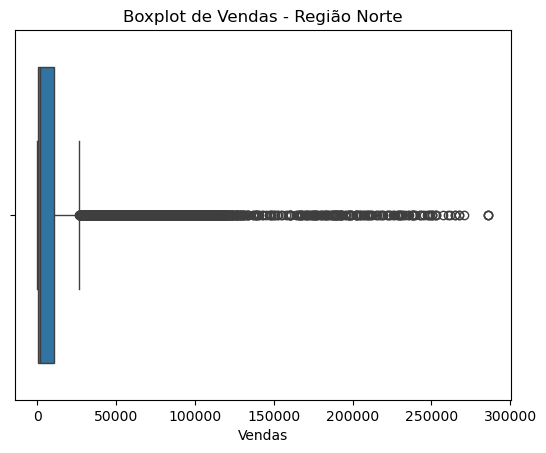

In [163]:
sns.boxplot(x=df_norte['VENDAS'])

plt.title('Boxplot de Vendas - Região Norte')
plt.xlabel('Vendas')
plt.show()


<h1 style="color:red;">Removendo outliers utlizando o método IQR</h1>


In [165]:
#Remoção de Outliers

df_norte_sem_outliers = df_norte.copy()

Q1 = df['VENDAS'].quantile(0.25)  
Q3 = df['VENDAS'].quantile(0.75)  
IQR = Q3 - Q1 


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


df_norte_sem_outliers  = df_norte_sem_outliers [
    (df_norte_sem_outliers['VENDAS'] >= limite_inferior) & 
    (df_norte_sem_outliers['VENDAS'] <= limite_superior)
]

# 
#print("Limite Inferior:", limite_inferior)
#print("Limite Superior:", limite_superior)



In [166]:
print("DataFrame sem outliers - Norte")
df_norte_sem_outliers #chamar df_sem_outliers caso precise

DataFrame sem outliers - Norte


,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
39,1990,3892.205,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
50,1990,12436.147,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
51,1990,713.300,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
52,1990,12886.007,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
53,1990,16419.354,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90063,2024,75560.540,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
90064,2024,14662.600,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
90065,2024,20471.700,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
90066,2024,22434.400,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


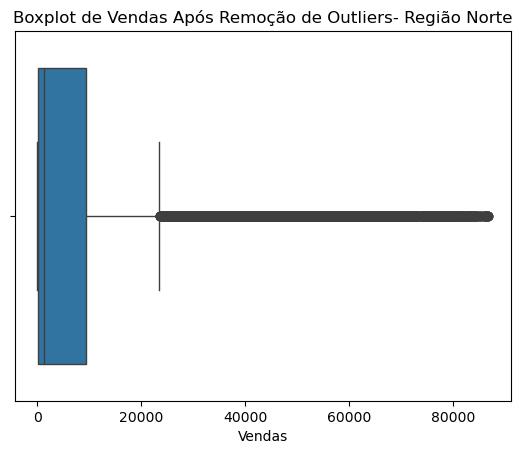

In [167]:
sns.boxplot(x=df_norte_sem_outliers['VENDAS'])

plt.title('Boxplot de Vendas Após Remoção de Outliers- Região Norte')
plt.xlabel('Vendas')
plt.show()


<h1 style="color:red;"> Calcular a matriz de correlação (sem gráfico)</h1>


<h2 style="color:red;">Sem outliers - Correlação</h2>


In [170]:
# Calcular a matriz de correlação SEM outliers
corr_matrix = df_norte_sem_outliers.corr()

print("Norte - Top 10 correlações com VENDAS (sem outliers):\n")
print(corr_matrix['VENDAS'].sort_values(ascending=False).head(10))

print("\nNorte - Top 10 correlações negativas com VENDAS(sem outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).tail(10))


Norte - Top 10 correlações com VENDAS (sem outliers):

VENDAS                           1.000000
PRODUTO_ÓLEO DIESEL              0.499512
UNIDADE DA FEDERAÇÃO_PARÁ        0.236958
PRODUTO_GASOLINA C               0.200205
UNIDADE DA FEDERAÇÃO_AMAZONAS    0.185904
ANO                              0.092447
UNIDADE DA FEDERAÇÃO_RONDÔNIA    0.054556
PRODUTO_ÓLEO COMBUSTÍVEL         0.047006
MÊS_DEZ                          0.007347
MÊS_SET                          0.003536
Name: VENDAS, dtype: float64

Norte - Top 10 correlações negativas com VENDAS(sem outliers):
MÊS_FEV                          -0.007203
UNIDADE DA FEDERAÇÃO_TOCANTINS   -0.016291
PRODUTO_GLP                      -0.017698
PRODUTO_QUEROSENE DE AVIAÇÃO     -0.120318
UNIDADE DA FEDERAÇÃO_AMAPÁ       -0.142297
UNIDADE DA FEDERAÇÃO_ACRE        -0.146688
UNIDADE DA FEDERAÇÃO_RORAIMA     -0.155466
PRODUTO_ETANOL HIDRATADO         -0.156193
PRODUTO_GASOLINA DE AVIAÇÃO      -0.203905
PRODUTO_QUEROSENE ILUMINANTE     -0.205698
Na

<h2 style="color:red;">Com outliers - Correlação</h2>


In [172]:
# Calcular a matriz de correlação SEM outliers
corr_matrix = df_norte.corr()

print("Top 10 correlações com VENDAS (com outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).head(10))

print("\nTop 10 correlações negativas com VENDAS(com outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).tail(10))


Top 10 correlações com VENDAS (com outliers):
VENDAS                           1.000000
PRODUTO_ÓLEO DIESEL              0.541757
UNIDADE DA FEDERAÇÃO_PARÁ        0.350746
ANO                              0.157684
PRODUTO_GASOLINA C               0.126709
UNIDADE DA FEDERAÇÃO_AMAZONAS    0.116734
MÊS_AGO                          0.009774
MÊS_OUT                          0.009544
MÊS_JUL                          0.007480
MÊS_SET                          0.007325
Name: VENDAS, dtype: float64

Top 10 correlações negativas com VENDAS(com outliers):
MÊS_FEV                          -0.016001
UNIDADE DA FEDERAÇÃO_TOCANTINS   -0.034364
PRODUTO_GLP                      -0.058028
PRODUTO_QUEROSENE DE AVIAÇÃO     -0.119427
UNIDADE DA FEDERAÇÃO_AMAPÁ       -0.136350
UNIDADE DA FEDERAÇÃO_ACRE        -0.138976
PRODUTO_ETANOL HIDRATADO         -0.140892
UNIDADE DA FEDERAÇÃO_RORAIMA     -0.144226
PRODUTO_GASOLINA DE AVIAÇÃO      -0.169439
PRODUTO_QUEROSENE ILUMINANTE     -0.170511
Name: VENDAS, dtype

<h2 style="color:red;">Treinamento</h2>


<h2 style="color:red;">Regressão Linear</h2>


In [175]:
%%time

# Variáveis com maior correlação 
#PRODUTO_ÓLEO DIESEL              0.499512
#UNIDADE DA FEDERAÇÃO_PARÁ        0.236958
#PRODUTO_GASOLINA C               0.200205
#UNIDADE DA FEDERAÇÃO_AMAZONAS    0.185904

X = df_norte_sem_outliers[['PRODUTO_ÓLEO DIESEL', 
        'UNIDADE DA FEDERAÇÃO_PARÁ', 
        'PRODUTO_GASOLINA C', 
        'UNIDADE DA FEDERAÇÃO_AMAZONAS']]  


y = df_norte_sem_outliers['VENDAS']

# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões no conjunto de teste
predicao_test = model.predict(X_test)

# Métricas para conjunto de teste
mse_test = mean_squared_error(y_test, predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, predicao_test)
r2_test = r2_score(y_test, predicao_test)

print("\nNorte- Regressão Linear - Sem Outliers (Conjunto de Teste):\n")
print(f'Erro Quadrático Médio (MSE): {mse_test:.2f}')
print(f'Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}\n')

# Configuração para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(model, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Nordeste - Regressão Linear - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Média das vendas
vendas_mean = y.mean()

# Percentuais de erro em relação à média (Conjunto de Teste)
mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

# Percentuais de erro em relação à média (Validação Cruzada)
mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados
print(f"Métricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")







Norte- Regressão Linear - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 141988257.20
Coeficiente de Determinação (R²): 0.47 -> 46.73%
Root Mean Squared Error (RMSE): 11915.88
Mean Absolute Error (MAE): 6586.59

Nordeste - Regressão Linear - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 139847379.26
Root Mean Squared Error (RMSE): 11825.71
Mean Absolute Error (MAE): 6553.61
Coeficiente de Determinação (R²): 0.46 -> 46.28%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 2140877.94
Diferença de RMSE: 90.17
Diferença de MAE: 32.98
Diferença de R²: 0.00
Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 75.75%
Erro Relativo (RMSE/Média): 137.05%

Validação Cruzada:
Erro Relativo (MAE/Média): 75.38%
Erro Relativo (RMSE/Média): 136.01%

Tempo decorrido:
CPU times: total: 109 ms
Wall time: 69.6 ms
Parser   : 141 ms


<h2 style="color:red;">Árvore Decisão</h2>


In [177]:
%%time

# Separação de dados
X = df_norte_sem_outliers.drop(columns=['VENDAS'])
y = df_norte_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
dtree = DecisionTreeRegressor(criterion='squared_error')
dtree.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_test = dtree.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nNorte - Árvore de Decisão - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(dtree, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Performance na Validação Cruzada:")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()
vendas_median = y.median()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")



Norte - Árvore de Decisão - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 9941772.03
Root Mean Squared Error (RMSE): 3153.06
Mean Absolute Error (MAE): 1055.27
Coeficiente de Determinação (R²): 0.96 -> 96.18%

Performance na Validação Cruzada:
Erro Quadrático Médio (MSE): 9569990.80
Root Mean Squared Error (RMSE): 3093.54
Mean Absolute Error (MAE): 1017.75
Coeficiente de Determinação (R²): 0.96 -> 96.32%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 371781.24
Diferença de RMSE: 59.52
Diferença de MAE: 37.52
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 12.14%
Erro Relativo (RMSE/Média): 36.26%

Validação Cruzada:
Erro Relativo (MAE/Média): 11.71%
Erro Relativo (RMSE/Média): 35.58%

Tempo decorrido:
CPU times: total: 1.58 s
Wall time: 1.61 s


<h2 style="color:red;">Floresta Aleatória</h2>


In [179]:
%%time

# Separação de dados
X = df_norte_sem_outliers.drop(columns=['VENDAS'])
y = df_norte_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Previsões no conjunto de teste
rfc_predicao_test = rfc.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, rfc_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, rfc_predicao_test)
r2_test = r2_score(y_test, rfc_predicao_test)

print(f"Norte - Floresta Aleatória - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(rfc, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Norte - Floresta Aleatória - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()
vendas_median = y.median()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")

Norte - Floresta Aleatória - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 6379173.56
Root Mean Squared Error (RMSE): 2525.70
Mean Absolute Error (MAE): 845.33
Coeficiente de Determinação (R²): 0.98 -> 97.55%

Norte - Floresta Aleatória - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 6413217.45
Root Mean Squared Error (RMSE): 2532.43
Mean Absolute Error (MAE): 842.81
Coeficiente de Determinação (R²): 0.98 -> 97.54%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 34043.89
Diferença de RMSE: 6.73
Diferença de MAE: 2.52
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 9.72%
Erro Relativo (RMSE/Média): 29.05%

Validação Cruzada:
Erro Relativo (MAE/Média): 9.69%
Erro Relativo (RMSE/Média): 29.13%

Tempo decorrido:
CPU times: total: 45.2 s
Wall time: 50.5 s


<h1 style="color:red;">Gradient Boosting Regressor</h1>


In [181]:
%%time
# Gradient Boosting Regressor
X = df_norte_sem_outliers.drop(columns=['VENDAS'])
y = df_norte_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
gbr.fit(X_train, y_train)

# Previsões no conjunto de teste
gbr_predicao_test = gbr.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, gbr_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, gbr_predicao_test)
r2_test = r2_score(y_test, gbr_predicao_test)

print(f"Norte - Gradient Boosting - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(gbr, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Norte - Gradient Boosting - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Norte - Gradient Boosting - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 5476751.62
Root Mean Squared Error (RMSE): 2340.25
Mean Absolute Error (MAE): 955.48
Coeficiente de Determinação (R²): 0.98 -> 97.90%

Norte - Gradient Boosting - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 5661853.90
Root Mean Squared Error (RMSE): 2379.47
Mean Absolute Error (MAE): 937.39
Coeficiente de Determinação (R²): 0.98 -> 97.82%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 185102.28
Diferença de RMSE: 39.22
Diferença de MAE: 18.10
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 10.99%
Erro Relativo (RMSE/Média): 26.92%

Validação Cruzada:
Erro Relativo (MAE/Média): 10.78%
Erro Relativo (RMSE/Média): 27.37%

Tempo decorrido:
CPU times: total: 1min 16s
Wall time: 1min 27s


<h1 style="color:red;">Ada Boost</h1>


In [183]:
%%time
# Separação de dados
X = df_norte_sem_outliers.drop(columns=['VENDAS'])
y = df_norte_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
adaboost = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)

# Previsões no conjunto de teste
adaboost_predicao_test = adaboost.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, adaboost_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, adaboost_predicao_test)
r2_test = r2_score(y_test, adaboost_predicao_test)

print(f"Norte - AdaBoost - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(adaboost, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Norte - AdaBoost - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")



Norte - AdaBoost - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 85814344.27
Root Mean Squared Error (RMSE): 9263.60
Mean Absolute Error (MAE): 6606.03
Coeficiente de Determinação (R²): 0.67 -> 67.06%

Norte - AdaBoost - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 92154276.91
Root Mean Squared Error (RMSE): 9599.70
Mean Absolute Error (MAE): 6866.06
Coeficiente de Determinação (R²): 0.65 -> 64.56%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 6339932.63
Diferença de RMSE: 336.10
Diferença de MAE: 260.04
Diferença de R²: 0.03

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 75.98%
Erro Relativo (RMSE/Média): 106.54%

Validação Cruzada:
Erro Relativo (MAE/Média): 78.97%
Erro Relativo (RMSE/Média): 110.41%

Tempo decorrido:
CPU times: total: 41.2 s
Wall time: 48 s


<h1 style="color:red;">Bagging Regressor</h1>


In [185]:
%%time
# Separação de dados
X = df_norte_sem_outliers.drop(columns=['VENDAS'])
y = df_norte_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(criterion='squared_error'), 
                           n_estimators=100, 
                           random_state=42)
bagging.fit(X_train, y_train)

# Previsões no conjunto de teste
bagging_predicao_test = bagging.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, bagging_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, bagging_predicao_test)
r2_test = r2_score(y_test, bagging_predicao_test)

print(f"Norte - Bagging Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(bagging, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Norte - Bagging Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")

Norte - Bagging Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 6378433.23
Root Mean Squared Error (RMSE): 2525.56
Mean Absolute Error (MAE): 845.31
Coeficiente de Determinação (R²): 0.98 -> 97.55%

Norte - Bagging Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 6304867.48
Root Mean Squared Error (RMSE): 2510.95
Mean Absolute Error (MAE): 828.76
Coeficiente de Determinação (R²): 0.98 -> 97.57%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 73565.75
Diferença de RMSE: 14.61
Diferença de MAE: 16.55
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 9.72%
Erro Relativo (RMSE/Média): 29.05%

Validação Cruzada:
Erro Relativo (MAE/Média): 9.53%
Erro Relativo (RMSE/Média): 28.88%

Tempo decorrido:
CPU times: total: 1min 34s
Wall time: 1min 45s


<h1 style="color:red;">KNN</h1>


In [187]:
%%time
# KNN Regressor
X = df_norte_sem_outliers.drop(columns=['VENDAS'])
y = df_norte_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Usando 5 vizinhos como padrão
knn_regressor.fit(X_train, y_train)

# Previsões no conjunto de teste
predicao_test = knn_regressor.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, predicao_test)
r2_test = r2_score(y_test, predicao_test)

print(f"Região Norte - KNN Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(knn_regressor, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Região Norte - KNN Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Região Norte - KNN Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 62996679.91
Root Mean Squared Error (RMSE): 7937.04
Mean Absolute Error (MAE): 4078.51
Coeficiente de Determinação (R²): 0.76 -> 75.82%

Região Norte - KNN Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 53279069.00
Root Mean Squared Error (RMSE): 7299.25
Mean Absolute Error (MAE): 3648.92
Coeficiente de Determinação (R²): 0.80 -> 79.58%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 9717610.92
Diferença de RMSE: 637.79
Diferença de MAE: 429.59
Diferença de R²: 0.04

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 46.91%
Erro Relativo (RMSE/Média): 91.29%

Validação Cruzada:
Erro Relativo (MAE/Média): 41.97%
Erro Relativo (RMSE/Média): 83.95%

Tempo decorrido:
CPU times: total: 18.1 s
Wall time: 17.1 s


<h1 style="color:red;">Stacking</h1>


In [189]:
%%time

# Separação de dados
X = df_norte_sem_outliers.drop(columns=['VENDAS'])
y = df_norte_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bases = [
    ('dt', DecisionTreeRegressor(criterion='squared_error', random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=200, random_state=42))
]

# Modelo meta (final)
meta_model = LinearRegression()

# Configuração do Stacking Regressor
stacking = StackingRegressor(estimators=bases, final_estimator=meta_model)
stacking.fit(X_train, y_train)

# Previsões no conjunto de teste
stacking_predicao_test = stacking.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, stacking_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, stacking_predicao_test)
r2_test = r2_score(y_test, stacking_predicao_test)

print(f"Norte - Stacking Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(stacking, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Norte - Stacking Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Norte - Stacking Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 5950450.10
Root Mean Squared Error (RMSE): 2439.35
Mean Absolute Error (MAE): 865.51
Coeficiente de Determinação (R²): 0.98 -> 97.72%

Norte - Stacking Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 6951015.34
Root Mean Squared Error (RMSE): 2636.48
Mean Absolute Error (MAE): 1112.76
Coeficiente de Determinação (R²): 0.97 -> 97.33%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 1000565.24
Diferença de RMSE: 197.12
Diferença de MAE: 247.25
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 9.95%
Erro Relativo (RMSE/Média): 28.06%

Validação Cruzada:
Erro Relativo (MAE/Média): 12.80%
Erro Relativo (RMSE/Média): 30.32%

Tempo decorrido:
CPU times: total: 11min 10s
Wall time: 12min 36s


<h1 style="color:yellow;">Pré- processamento - Região Centro-Oeste</h1>


<h1 style="color:yellow;">Explorando e entendendo a média de vendas total da Região Centro-Oeste</h1>


In [192]:
media_vendas_centro_oeste = df_centro_oeste['VENDAS'].mean()

print(f"Média de vendas na Região Centro-Oeste: {media_vendas_centro_oeste:.2f} m³")


Média de vendas na Região Centro-Oeste: 29407.82 m³


In [193]:
df_centro_oeste

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
0,1990,JAN,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,29876.051
1,1990,SET,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,20544.692
2,1990,OUT,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,15368.064
3,1990,NOV,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,34415.728
4,1990,FEV,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,21750.741
...,...,...,...,...,...,...
89885,2024,JUL,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,35110.900
89886,2024,JUN,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,32308.500
89914,2024,AGO,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,36021.000
89951,2024,JAN,REGIÃO CENTRO-OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,147712.235


<h1 style="color:yellow;">Dividindo o DF Centro-Oeste em categórico e numérico</h1>


In [195]:
df_categorico_centro_oeste= df_centro_oeste.select_dtypes(include=['object'])
df_numerico_centro_oeste = df_centro_oeste.select_dtypes(include=['number'])

<h1 style="color:yellow;">Centro-Oeste - Categórico</h1>


In [197]:
df_categorico_centro_oeste

,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO
0,JAN,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO
1,SET,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO
2,OUT,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO
3,NOV,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO
4,FEV,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO
...,...,...,...,...
89885,JUL,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ÓLEO DIESEL
89886,JUN,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ÓLEO DIESEL
89914,AGO,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ÓLEO DIESEL
89951,JAN,REGIÃO CENTRO-OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL


In [198]:
print(f'Centro-Oeste  - Colunas do DataFrame Categórico:\n\n{df_categorico_centro_oeste.columns}')

Centro-Oeste  - Colunas do DataFrame Categórico:

Index(['MÊS', 'GRANDE REGIÃO', 'UNIDADE DA FEDERAÇÃO', 'PRODUTO'], dtype='object')


<h1 style="color:yellow;">Centro-Oeste - Numérico</h1>


In [200]:
df_numerico_centro_oeste

,ANO,VENDAS
0,1990,29876.051
1,1990,20544.692
2,1990,15368.064
3,1990,34415.728
4,1990,21750.741
...,...,...
89885,2024,35110.900
89886,2024,32308.500
89914,2024,36021.000
89951,2024,147712.235


In [201]:
print(f'Centro-Oeste  - Colunas do DataFrame Numérico:\n\n{df_numerico_centro_oeste.columns}')

Centro-Oeste  - Colunas do DataFrame Numérico:

Index(['ANO', 'VENDAS'], dtype='object')


<h1 style="color:yellow;">Transformando variáveis categóricas</h1>


<h1 style="color:yellow;">One-Hot Encoding para PRODUTO, GRANDE REGIÃO,UNIDADE DE FEDERAÇÃO, MÊS</h1>


In [204]:
# One-Hot Encoding para PRODUTO e outras categorias
df_centro_oeste = df_centro_oeste.drop(columns=["GRANDE REGIÃO"])

df_centro_oeste = pd.get_dummies(df_centro_oeste  , columns=['PRODUTO'], drop_first=False)
#df_df_centro_oeste = pd.get_dummies(df_centro_oeste , columns=['GRANDE REGIÃO'], drop_first=False)
df_centro_oeste= pd.get_dummies(df_centro_oeste , columns=['UNIDADE DA FEDERAÇÃO'], drop_first=False)
df_centro_oeste = pd.get_dummies(df_centro_oeste , columns=['MÊS'], drop_first=False)

In [205]:
df_centro_oeste

,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
0,1990,29876.051,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,1990,20544.692,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1990,15368.064,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1990,34415.728,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1990,21750.741,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89885,2024,35110.900,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
89886,2024,32308.500,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
89914,2024,36021.000,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
89951,2024,147712.235,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [206]:
print(f'Centro-Oeste  - Colunas transformadas:\n\n{df_centro_oeste.columns}')

Centro-Oeste  - Colunas transformadas:

Index(['ANO', 'VENDAS', 'PRODUTO_ETANOL HIDRATADO', 'PRODUTO_GASOLINA C',
       'PRODUTO_GASOLINA DE AVIAÇÃO', 'PRODUTO_GLP',
       'PRODUTO_QUEROSENE DE AVIAÇÃO', 'PRODUTO_QUEROSENE ILUMINANTE',
       'PRODUTO_ÓLEO COMBUSTÍVEL', 'PRODUTO_ÓLEO DIESEL',
       'UNIDADE DA FEDERAÇÃO_DISTRITO FEDERAL', 'UNIDADE DA FEDERAÇÃO_GOIÁS',
       'UNIDADE DA FEDERAÇÃO_MATO GROSSO',
       'UNIDADE DA FEDERAÇÃO_MATO GROSSO DO SUL', 'MÊS_ABR', 'MÊS_AGO',
       'MÊS_DEZ', 'MÊS_FEV', 'MÊS_JAN', 'MÊS_JUL', 'MÊS_JUN', 'MÊS_MAI',
       'MÊS_MAR', 'MÊS_NOV', 'MÊS_OUT', 'MÊS_SET'],
      dtype='object')


<h1 style="color:yellow;">Outliers</h1>


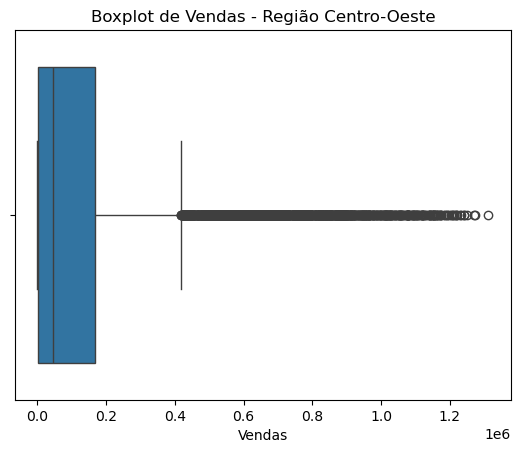

In [208]:
sns.boxplot(x=df_sudeste['VENDAS'])

plt.title('Boxplot de Vendas - Região Centro-Oeste')
plt.xlabel('Vendas')
plt.show()


<h1 style="color:yellow;">Removendo outliers utlizando o método IQR</h1>


In [210]:
#Remoção de Outliers

df_centro_oeste_sem_outliers = df_centro_oeste.copy()

Q1 = df['VENDAS'].quantile(0.25)  
Q3 = df['VENDAS'].quantile(0.75)  
IQR = Q3 - Q1 


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


df_centro_oeste_sem_outliers = df_centro_oeste_sem_outliers[
    (df_centro_oeste_sem_outliers['VENDAS'] >= limite_inferior) & 
    (df_centro_oeste_sem_outliers['VENDAS'] <= limite_superior)
]

 
#print("Limite Inferior:", limite_inferior)
#print("Limite Superior:", limite_superior)



In [211]:
print("DataFrame sem outliers - Centro-Oeste")
df_centro_oeste_sem_outliers #chamar df_sem_outliers caso precise

DataFrame sem outliers - Centro-Oeste


,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
0,1990,29876.051,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,1990,20544.692,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1990,15368.064,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1990,34415.728,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1990,21750.741,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89860,2024,33737.200,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
89873,2024,34075.000,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
89885,2024,35110.900,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
89886,2024,32308.500,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


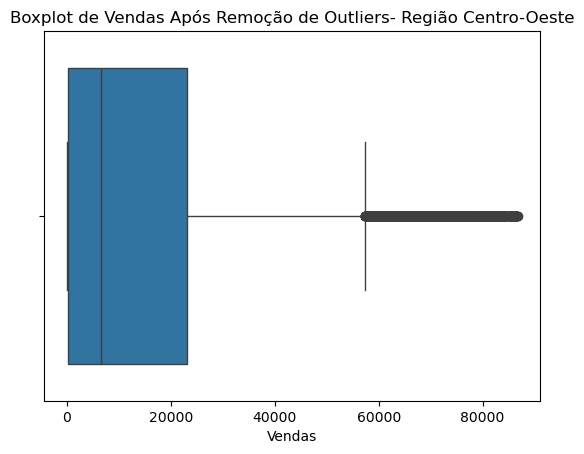

In [212]:
sns.boxplot(x=df_centro_oeste_sem_outliers['VENDAS'])

plt.title('Boxplot de Vendas Após Remoção de Outliers- Região Centro-Oeste')
plt.xlabel('Vendas')
plt.show()


<h1 style="color:yellow;"> Calcular a matriz de correlação (sem gráfico)</h1>


<h2 style="color:yellow;">Sem outliers - Correlação</h2>


In [215]:
# Calcular a matriz de correlação SEM outliers
corr_matrix = df_centro_oeste_sem_outliers.corr()

print("Centro-Oeste - Top 10 correlações com VENDAS (sem outliers):\n")
print(corr_matrix['VENDAS'].sort_values(ascending=False).head(10))

print("\nCentro-Oeste - Top 10 correlações negativas com VENDAS(sem outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).tail(10))


Centro-Oeste - Top 10 correlações com VENDAS (sem outliers):

VENDAS                                   1.000000
PRODUTO_GASOLINA C                       0.492214
PRODUTO_ÓLEO DIESEL                      0.378516
UNIDADE DA FEDERAÇÃO_GOIÁS               0.129818
PRODUTO_GLP                              0.102549
PRODUTO_ETANOL HIDRATADO                 0.093115
ANO                                      0.047476
MÊS_DEZ                                  0.012519
UNIDADE DA FEDERAÇÃO_DISTRITO FEDERAL    0.010325
MÊS_JAN                                  0.005274
Name: VENDAS, dtype: float64

Centro-Oeste - Top 10 correlações negativas com VENDAS(sem outliers):
MÊS_AGO                                   -0.002447
MÊS_SET                                   -0.002647
MÊS_FEV                                   -0.006503
MÊS_OUT                                   -0.007015
UNIDADE DA FEDERAÇÃO_MATO GROSSO DO SUL   -0.047673
UNIDADE DA FEDERAÇÃO_MATO GROSSO          -0.087775
PRODUTO_QUEROSENE DE AVIAÇ

<h2 style="color:yellow;">Com outliers - Correlação</h2>


In [217]:
# Calcular a matriz de correlação COM outliers
corr_matrix = df_centro_oeste.corr()

print("Top 10 correlações com VENDAS (com outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).head(10))

print("\nTop 10 correlações negativas com VENDAS(com outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).tail(10))


Top 10 correlações com VENDAS (com outliers):
VENDAS                              1.000000
PRODUTO_ÓLEO DIESEL                 0.666054
ANO                                 0.196666
UNIDADE DA FEDERAÇÃO_GOIÁS          0.196032
PRODUTO_GASOLINA C                  0.185758
UNIDADE DA FEDERAÇÃO_MATO GROSSO    0.038809
MÊS_AGO                             0.014409
MÊS_OUT                             0.013817
MÊS_JUL                             0.012147
MÊS_SET                             0.010025
Name: VENDAS, dtype: float64

Top 10 correlações negativas com VENDAS(com outliers):
MÊS_FEV                                   -0.013070
PRODUTO_ETANOL HIDRATADO                  -0.014823
MÊS_JAN                                   -0.018182
PRODUTO_GLP                               -0.067442
UNIDADE DA FEDERAÇÃO_MATO GROSSO DO SUL   -0.106160
UNIDADE DA FEDERAÇÃO_DISTRITO FEDERAL     -0.128681
PRODUTO_QUEROSENE DE AVIAÇÃO              -0.154793
PRODUTO_ÓLEO COMBUSTÍVEL                  -0.170015
PRO

<h2 style="color:yellow;">Treinamento</h2>


<h2 style="color:yellow;">Regressão Linear</h2>


In [220]:
%%time

# Variáveis com maior correlação Centro-Oeste 
#PRODUTO_GASOLINA C                       0.492214
#PRODUTO_ÓLEO DIESEL                      0.378516
#UNIDADE DA FEDERAÇÃO_GOIÁS               0.129818
#PRODUTO_GLP                              0.102549

X = df_centro_oeste_sem_outliers[['PRODUTO_GASOLINA C', 
        'PRODUTO_ÓLEO DIESEL', 
        'UNIDADE DA FEDERAÇÃO_GOIÁS', 
        'PRODUTO_GASOLINA C',  
        'PRODUTO_GLP']]  


y = df_centro_oeste_sem_outliers['VENDAS']

# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões no conjunto de teste
predicao_test = model.predict(X_test)

# Métricas para conjunto de teste
mse_test = mean_squared_error(y_test, predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, predicao_test)
r2_test = r2_score(y_test, predicao_test)

print("\nCentro-Oeste- Regressão Linear - Sem Outliers (Conjunto de Teste):\n")
print(f'Erro Quadrático Médio (MSE): {mse_test:.2f}')
print(f'Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}\n')

# Configuração para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(model, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Centro-Oeste - Regressão Linear - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

print(f"Métricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")




Centro-Oeste- Regressão Linear - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 197176473.00
Coeficiente de Determinação (R²): 0.52 -> 52.26%
Root Mean Squared Error (RMSE): 14041.95
Mean Absolute Error (MAE): 9646.56

Centro-Oeste - Regressão Linear - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 198934466.98
Root Mean Squared Error (RMSE): 14104.41
Mean Absolute Error (MAE): 9835.66
Coeficiente de Determinação (R²): 0.51 -> 51.00%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 1757993.98
Diferença de RMSE: 62.46
Diferença de MAE: 189.10
Diferença de R²: 0.01
Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 62.61%
Erro Relativo (RMSE/Média): 91.14%

Validação Cruzada:
Erro Relativo (MAE/Média): 63.84%
Erro Relativo (RMSE/Média): 91.54%

Tempo decorrido:
CPU times: total: 109 ms
Wall time: 64.5 ms


<h2 style="color:yellow;">Árvore Decisão</h2>


In [222]:
%%time

# Árvore
X = df_centro_oeste_sem_outliers.drop(columns=['VENDAS'])
y = df_centro_oeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
dtree = DecisionTreeRegressor(criterion='squared_error')
dtree.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_test = dtree.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nCentro-oeste - Árvore de Decisão - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(dtree, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Performance na Validação Cruzada:")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()
vendas_median = y.median()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")




Centro-oeste - Árvore de Decisão - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 10055334.27
Root Mean Squared Error (RMSE): 3171.01
Mean Absolute Error (MAE): 1475.98
Coeficiente de Determinação (R²): 0.98 -> 97.54%

Performance na Validação Cruzada:
Erro Quadrático Médio (MSE): 9231779.24
Root Mean Squared Error (RMSE): 3038.38
Mean Absolute Error (MAE): 1429.00
Coeficiente de Determinação (R²): 0.98 -> 97.72%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 823555.03
Diferença de RMSE: 132.63
Diferença de MAE: 46.98
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 9.58%
Erro Relativo (RMSE/Média): 20.58%

Validação Cruzada:
Erro Relativo (MAE/Média): 9.27%
Erro Relativo (RMSE/Média): 19.72%

Tempo decorrido:
CPU times: total: 812 ms
Wall time: 949 ms


<h2 style="color:yellow;">Floresta Aleatória</h2>


In [224]:
%%time

# Separação de dados
X = df_centro_oeste_sem_outliers.drop(columns=['VENDAS'])
y = df_centro_oeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Previsões no conjunto de teste
rfc_predicao_test = rfc.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, rfc_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, rfc_predicao_test)
r2_test = r2_score(y_test, rfc_predicao_test)

print(f"Centro-Oeste - Floresta Aleatória - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(rfc, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Centro-Oeste - Floresta Aleatória - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()
vendas_median = y.median()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")

Centro-Oeste - Floresta Aleatória - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 6705458.46
Root Mean Squared Error (RMSE): 2589.49
Mean Absolute Error (MAE): 1221.68
Coeficiente de Determinação (R²): 0.98 -> 98.36%

Centro-Oeste - Floresta Aleatória - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 6117060.67
Root Mean Squared Error (RMSE): 2473.27
Mean Absolute Error (MAE): 1184.99
Coeficiente de Determinação (R²): 0.98 -> 98.49%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 588397.79
Diferença de RMSE: 116.22
Diferença de MAE: 36.69
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 7.93%
Erro Relativo (RMSE/Média): 16.81%

Validação Cruzada:
Erro Relativo (MAE/Média): 7.69%
Erro Relativo (RMSE/Média): 16.05%

Tempo decorrido:
CPU times: total: 23.2 s
Wall time: 26.3 s


<h1 style="color:yellow;">Gradient Boosting Regressor</h1>
<p style="color:black;">Os parâmetros do modelo foram ajustados para <strong>n_estimators=300</strong> e <strong>max_depth=6</strong>, a fim de alcançar uma melhor performance, reduzindo os erros de previsão e aumentando a precisão do modelo.</p>


In [226]:
%%time
# Gradient Boosting Regressor
X = df_centro_oeste_sem_outliers.drop(columns=['VENDAS'])
y = df_centro_oeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
gbr.fit(X_train, y_train)

# Previsões no conjunto de teste
gbr_predicao_test = gbr.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, gbr_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, gbr_predicao_test)
r2_test = r2_score(y_test, gbr_predicao_test)

print(f"Centro-Oeste - Gradient Boosting - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(gbr, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Nordeste - Gradient Boosting - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Centro-Oeste - Gradient Boosting - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 5937552.46
Root Mean Squared Error (RMSE): 2436.71
Mean Absolute Error (MAE): 1302.35
Coeficiente de Determinação (R²): 0.99 -> 98.55%

Nordeste - Gradient Boosting - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 5214337.34
Root Mean Squared Error (RMSE): 2283.49
Mean Absolute Error (MAE): 1240.90
Coeficiente de Determinação (R²): 0.99 -> 98.71%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 723215.12
Diferença de RMSE: 153.22
Diferença de MAE: 61.44
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 8.45%
Erro Relativo (RMSE/Média): 15.82%

Validação Cruzada:
Erro Relativo (MAE/Média): 8.05%
Erro Relativo (RMSE/Média): 14.82%

Tempo decorrido:
CPU times: total: 39 s
Wall time: 43.8 s


<h1 style="color:yellow;">Ada Boost</h1>


In [228]:

%%time
# Separação de dados
X = df_centro_oeste_sem_outliers.drop(columns=['VENDAS'])
y = df_centro_oeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
adaboost = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)

# Previsões no conjunto de teste
adaboost_predicao_test = adaboost.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, adaboost_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, adaboost_predicao_test)
r2_test = r2_score(y_test, adaboost_predicao_test)

print(f"Centro-Oeste - AdaBoost - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(adaboost, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Centro-Oeste - AdaBoost - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")



Centro-Oeste - AdaBoost - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 159242804.21
Root Mean Squared Error (RMSE): 12619.14
Mean Absolute Error (MAE): 10470.11
Coeficiente de Determinação (R²): 0.61 -> 61.04%

Centro-Oeste - AdaBoost - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 164251960.35
Root Mean Squared Error (RMSE): 12816.08
Mean Absolute Error (MAE): 10599.94
Coeficiente de Determinação (R²): 0.59 -> 59.49%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 5009156.14
Diferença de RMSE: 196.94
Diferença de MAE: 129.83
Diferença de R²: 0.02

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 67.96%
Erro Relativo (RMSE/Média): 81.90%

Validação Cruzada:
Erro Relativo (MAE/Média): 68.80%
Erro Relativo (RMSE/Média): 83.18%

Tempo decorrido:
CPU times: total: 21.8 s
Wall time: 25 s


<h1 style="color:yellow;">Bagging Regressor</h1>


In [230]:

%%time
# Separação de dados
X = df_centro_oeste_sem_outliers.drop(columns=['VENDAS'])
y = df_centro_oeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(criterion='squared_error'), 
                           n_estimators=100, 
                           random_state=42)
bagging.fit(X_train, y_train)

# Previsões no conjunto de teste
bagging_predicao_test = bagging.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, bagging_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, bagging_predicao_test)
r2_test = r2_score(y_test, bagging_predicao_test)

print(f"Centro-Oeste - Bagging Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(bagging, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Centro-oeste - Bagging Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")

Centro-Oeste - Bagging Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 6736892.21
Root Mean Squared Error (RMSE): 2595.55
Mean Absolute Error (MAE): 1223.60
Coeficiente de Determinação (R²): 0.98 -> 98.35%

Centro-oeste - Bagging Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 5997373.45
Root Mean Squared Error (RMSE): 2448.95
Mean Absolute Error (MAE): 1163.15
Coeficiente de Determinação (R²): 0.99 -> 98.52%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 739518.76
Diferença de RMSE: 146.60
Diferença de MAE: 60.45
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 7.94%
Erro Relativo (RMSE/Média): 16.85%

Validação Cruzada:
Erro Relativo (MAE/Média): 7.55%
Erro Relativo (RMSE/Média): 15.89%

Tempo decorrido:
CPU times: total: 49.3 s
Wall time: 55 s


<h1 style="color:yellow;">KNN</h1>


In [232]:

%%time
# KNN Regressor
X = df_centro_oeste_sem_outliers.drop(columns=['VENDAS'])
y = df_centro_oeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Usando 5 vizinhos como padrão
knn_regressor.fit(X_train, y_train)

# Previsões no conjunto de teste
predicao_test = knn_regressor.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, predicao_test)
r2_test = r2_score(y_test, predicao_test)

print(f"Região Centro-Oeste - KNN Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(knn_regressor, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Região Centro-Oeste - KNN Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")

Região Centro-Oeste - KNN Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 93746895.85
Root Mean Squared Error (RMSE): 9682.30
Mean Absolute Error (MAE): 6033.47
Coeficiente de Determinação (R²): 0.77 -> 77.07%

Região Centro-Oeste - KNN Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 78384300.81
Root Mean Squared Error (RMSE): 8853.49
Mean Absolute Error (MAE): 5135.49
Coeficiente de Determinação (R²): 0.81 -> 80.75%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 15362595.03
Diferença de RMSE: 828.81
Diferença de MAE: 897.97
Diferença de R²: 0.04

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 39.16%
Erro Relativo (RMSE/Média): 62.84%

Validação Cruzada:
Erro Relativo (MAE/Média): 33.33%
Erro Relativo (RMSE/Média): 57.46%

Tempo decorrido:
CPU times: total: 5.31 s
Wall time: 5.4 s


<h1 style="color:yellow;">Stacking</h1>


In [234]:
%%time

# Separação de dados
X = df_centro_oeste_sem_outliers.drop(columns=['VENDAS'])
y = df_centro_oeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelos base
bases = [
    ('dt', DecisionTreeRegressor(criterion='squared_error', random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=200, random_state=42))
]

# Modelo meta (final)
meta_model = LinearRegression()

# Configuração do Stacking Regressor
stacking = StackingRegressor(estimators=bases, final_estimator=meta_model)
stacking.fit(X_train, y_train)

# Previsões no conjunto de teste
stacking_predicao_test = stacking.predict(X_test)

# Métricas no conjunto de teste
mse_test = mean_squared_error(y_test, stacking_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, stacking_predicao_test)
r2_test = r2_score(y_test, stacking_predicao_test)

print(f"Centro-Oeste - Stacking Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(stacking, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Centro-Oeste - Stacking Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação entre Teste e Validação Cruzada
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Centro-Oeste - Stacking Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 6619611.42
Root Mean Squared Error (RMSE): 2572.86
Mean Absolute Error (MAE): 1237.49
Coeficiente de Determinação (R²): 0.98 -> 98.38%

Centro-Oeste - Stacking Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 7069472.57
Root Mean Squared Error (RMSE): 2658.85
Mean Absolute Error (MAE): 1384.81
Coeficiente de Determinação (R²): 0.98 -> 98.26%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 449861.15
Diferença de RMSE: 85.99
Diferença de MAE: 147.32
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 8.03%
Erro Relativo (RMSE/Média): 16.70%

Validação Cruzada:
Erro Relativo (MAE/Média): 8.99%
Erro Relativo (RMSE/Média): 17.26%

Tempo decorrido:
CPU times: total: 5min 56s
Wall time: 1h 47min 48s


<h1 style="color:blue;">Pré- processamento - Região Sul</h1>

<h1 style="color:blue;">Explorando e entendendo a média de vendas total da Região Sudeste</h1>


In [237]:
media_vendas_sul = df_sul['VENDAS'].mean()

print(f"Média de vendas na Região Sul: {media_vendas_sul:.2f} m³")


Média de vendas na Região Sul: 67571.57 m³


In [238]:
df_sul

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
6,1990,JUL,REGIÃO SUL,SANTA CATARINA,ETANOL HIDRATADO,34791.806
7,1990,MAI,REGIÃO SUL,RIO GRANDE DO SUL,ETANOL HIDRATADO,41067.643
10,1990,NOV,REGIÃO SUL,RIO GRANDE DO SUL,ETANOL HIDRATADO,53499.206
11,1990,OUT,REGIÃO SUL,RIO GRANDE DO SUL,ETANOL HIDRATADO,47092.445
12,1990,SET,REGIÃO SUL,RIO GRANDE DO SUL,ETANOL HIDRATADO,55670.805
...,...,...,...,...,...,...
89887,2024,FEV,REGIÃO SUL,SANTA CATARINA,ÓLEO DIESEL,251752.581
89912,2024,FEV,REGIÃO SUL,PARANÁ,ÓLEO DIESEL,524789.842
89948,2024,JUL,REGIÃO SUL,RIO GRANDE DO SUL,ÓLEO DIESEL,344436.786
89949,2024,AGO,REGIÃO SUL,RIO GRANDE DO SUL,ÓLEO DIESEL,334668.585


<h1 style="color:blue;">Dividindo o DF Sul em categórico e numérico</h1>


In [240]:
df_categorico_sul = df_sul.select_dtypes(include=['object'])
df_numerico_sul = df_sul.select_dtypes(include=['number'])

<h1 style="color:blue;">Sul - Categórico</h1>


In [242]:
df_categorico_sul

,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO
6,JUL,REGIÃO SUL,SANTA CATARINA,ETANOL HIDRATADO
7,MAI,REGIÃO SUL,RIO GRANDE DO SUL,ETANOL HIDRATADO
10,NOV,REGIÃO SUL,RIO GRANDE DO SUL,ETANOL HIDRATADO
11,OUT,REGIÃO SUL,RIO GRANDE DO SUL,ETANOL HIDRATADO
12,SET,REGIÃO SUL,RIO GRANDE DO SUL,ETANOL HIDRATADO
...,...,...,...,...
89887,FEV,REGIÃO SUL,SANTA CATARINA,ÓLEO DIESEL
89912,FEV,REGIÃO SUL,PARANÁ,ÓLEO DIESEL
89948,JUL,REGIÃO SUL,RIO GRANDE DO SUL,ÓLEO DIESEL
89949,AGO,REGIÃO SUL,RIO GRANDE DO SUL,ÓLEO DIESEL


In [243]:
print(f'Sul  - Colunas do DataFrame Categórico:\n\n{df_categorico_sul.columns}')

Sul  - Colunas do DataFrame Categórico:

Index(['MÊS', 'GRANDE REGIÃO', 'UNIDADE DA FEDERAÇÃO', 'PRODUTO'], dtype='object')


<h1 style="color:blue;">Sul - Numérico</h1>


In [245]:
df_numerico_sul

,ANO,VENDAS
6,1990,34791.806
7,1990,41067.643
10,1990,53499.206
11,1990,47092.445
12,1990,55670.805
...,...,...
89887,2024,251752.581
89912,2024,524789.842
89948,2024,344436.786
89949,2024,334668.585


In [246]:
print(f'Sul  - Colunas do DataFrame Numérico:\n\n{df_numerico_sul.columns}')

Sul  - Colunas do DataFrame Numérico:

Index(['ANO', 'VENDAS'], dtype='object')


<h1 style="color:blue;">Transformando variáveis categóricas</h1>


<h1 style="color:blue;">One-Hot Encoding para PRODUTO, GRANDE REGIÃO,UNIDADE DE FEDERAÇÃO, MÊS</h1>


In [249]:
# One-Hot Encoding para PRODUTO e outras categorias
df_sul = df_sul.drop(columns=["GRANDE REGIÃO"])

df_sul = pd.get_dummies(df_sul  , columns=['PRODUTO'], drop_first=False)
#df_sul= pd.get_dummies(df_sul , columns=['GRANDE REGIÃO'], drop_first=False)
df_sul = pd.get_dummies(df_sul , columns=['UNIDADE DA FEDERAÇÃO'], drop_first=False)
df_sul = pd.get_dummies(df_sul , columns=['MÊS'], drop_first=False)


In [250]:
df_sul

,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
6,1990,34791.806,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7,1990,41067.643,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10,1990,53499.206,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
11,1990,47092.445,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
12,1990,55670.805,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89887,2024,251752.581,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
89912,2024,524789.842,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
89948,2024,344436.786,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
89949,2024,334668.585,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [251]:
print(f'Sul  - Colunas transformadas:\n\n{df_sul.columns}')

Sul  - Colunas transformadas:

Index(['ANO', 'VENDAS', 'PRODUTO_ETANOL HIDRATADO', 'PRODUTO_GASOLINA C',
       'PRODUTO_GASOLINA DE AVIAÇÃO', 'PRODUTO_GLP',
       'PRODUTO_QUEROSENE DE AVIAÇÃO', 'PRODUTO_QUEROSENE ILUMINANTE',
       'PRODUTO_ÓLEO COMBUSTÍVEL', 'PRODUTO_ÓLEO DIESEL',
       'UNIDADE DA FEDERAÇÃO_PARANÁ', 'UNIDADE DA FEDERAÇÃO_RIO GRANDE DO SUL',
       'UNIDADE DA FEDERAÇÃO_SANTA CATARINA', 'MÊS_ABR', 'MÊS_AGO', 'MÊS_DEZ',
       'MÊS_FEV', 'MÊS_JAN', 'MÊS_JUL', 'MÊS_JUN', 'MÊS_MAI', 'MÊS_MAR',
       'MÊS_NOV', 'MÊS_OUT', 'MÊS_SET'],
      dtype='object')


<h1 style="color:blue;">Outliers</h1>


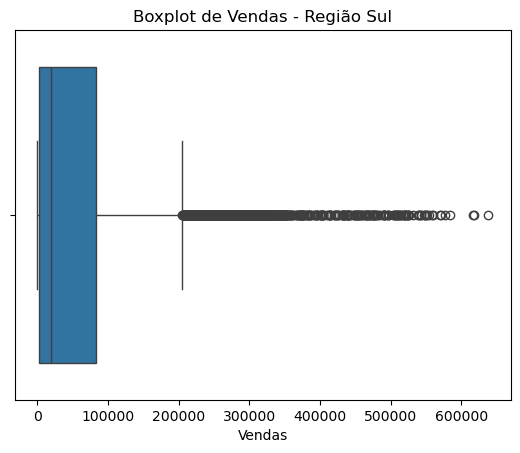

In [253]:
sns.boxplot(x=df_sul['VENDAS'])

plt.title('Boxplot de Vendas - Região Sul')
plt.xlabel('Vendas')
plt.show()


<h1 style="color:blue;">Removendo outliers utlizando o método IQR</h1>


In [255]:
#Remoção de Outliers

df_sul_sem_outliers = df_sul.copy()

Q1 = df['VENDAS'].quantile(0.25)  
Q3 = df['VENDAS'].quantile(0.75)  
IQR = Q3 - Q1 


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


df_sul_sem_outliers = df_sul_sem_outliers[
    (df_sul_sem_outliers['VENDAS'] >= limite_inferior) & 
    (df_sul_sem_outliers['VENDAS'] <= limite_superior)
]

# 
#print("Limite Inferior:", limite_inferior)
#print("Limite Superior:", limite_superior)



In [256]:
print("DataFrame sem outliers - Sudeste")
df_sul_sem_outliers #chamar df_sem_outliers caso precise

DataFrame sem outliers - Sudeste


,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
6,1990,34791.806,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7,1990,41067.643,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10,1990,53499.206,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
11,1990,47092.445,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
12,1990,55670.805,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89642,2024,2730.610,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
89677,2024,10859.221,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
89678,2024,11325.839,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
89679,2024,10329.441,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


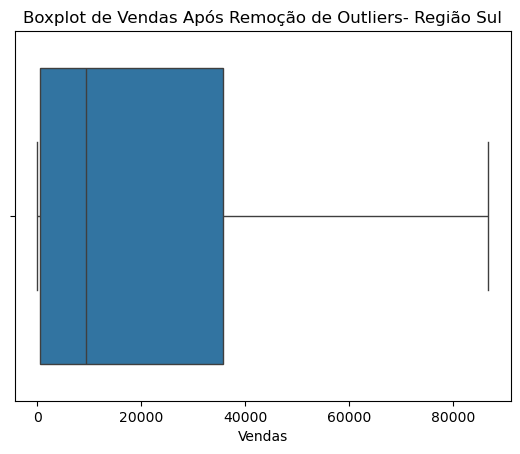

In [257]:
sns.boxplot(x=df_sul_sem_outliers['VENDAS'])

plt.title('Boxplot de Vendas Após Remoção de Outliers- Região Sul')
plt.xlabel('Vendas')
plt.show()


<h1 style="color:blue;"> Calcular a matriz de correlação (sem gráfico)</h1>


In [259]:
# Calcular a matriz de correlação SEM outliers
corr_matrix = df_sul_sem_outliers.corr()

print("Sul - Top 10 correlações com VENDAS (sem outliers):\n")
print(corr_matrix['VENDAS'].sort_values(ascending=False).head(10))

print("\nSudeste - Top 10 correlações negativas com VENDAS(sem outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).tail(10))


Sul - Top 10 correlações com VENDAS (sem outliers):

VENDAS                         1.000000
PRODUTO_GLP                    0.686485
PRODUTO_GASOLINA C             0.276766
PRODUTO_ÓLEO DIESEL            0.162856
UNIDADE DA FEDERAÇÃO_PARANÁ    0.135848
PRODUTO_ETANOL HIDRATADO       0.128408
MÊS_JUL                        0.011385
MÊS_AGO                        0.007443
MÊS_MAI                        0.006605
MÊS_OUT                        0.006018
Name: VENDAS, dtype: float64

Sudeste - Top 10 correlações negativas com VENDAS(sem outliers):
MÊS_ABR                                  -0.004476
UNIDADE DA FEDERAÇÃO_RIO GRANDE DO SUL   -0.004509
MÊS_JAN                                  -0.010417
PRODUTO_ÓLEO COMBUSTÍVEL                 -0.018562
MÊS_FEV                                  -0.021547
UNIDADE DA FEDERAÇÃO_SANTA CATARINA      -0.128142
ANO                                      -0.171220
PRODUTO_QUEROSENE DE AVIAÇÃO             -0.208691
PRODUTO_QUEROSENE ILUMINANTE             -0.

<h2 style="color:blue;">Com outliers - Correlação</h2>


In [261]:
# Calcular a matriz de correlação Com outliers
corr_matrix = df_sul.corr()

print("Top 10 correlações com VENDAS (com outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).head(10))

print("\nTop 10 correlações negativas com VENDAS(com outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).tail(10))


Top 10 correlações com VENDAS (com outliers):
VENDAS                                    1.000000
PRODUTO_ÓLEO DIESEL                       0.692183
PRODUTO_GASOLINA C                        0.386231
ANO                                       0.169790
UNIDADE DA FEDERAÇÃO_PARANÁ               0.122983
UNIDADE DA FEDERAÇÃO_RIO GRANDE DO SUL    0.019631
MÊS_AGO                                   0.010379
MÊS_OUT                                   0.009185
MÊS_MAR                                   0.008121
MÊS_DEZ                                   0.004794
Name: VENDAS, dtype: float64

Top 10 correlações negativas com VENDAS(com outliers):
MÊS_JUN                               -0.004999
MÊS_JAN                               -0.013862
MÊS_FEV                               -0.019505
PRODUTO_GLP                           -0.031211
PRODUTO_ETANOL HIDRATADO              -0.118641
UNIDADE DA FEDERAÇÃO_SANTA CATARINA   -0.142614
PRODUTO_ÓLEO COMBUSTÍVEL              -0.185855
PRODUTO_QUEROSENE DE AV

<h2 style="color:blue;">Treinamento</h2>


In [263]:
media_vendas_sul_sem_outliers = df_sul_sem_outliers['VENDAS'].mean()

print(f"Média de vendas na Região Sul do DF sem outliers: {media_vendas_sul_sem_outliers:.2f} m³")


media_vendas_sul = df_sul['VENDAS'].mean()

print(f"Média de vendas na Região Sul do DF antes de remover outliers: {media_vendas_sul:.2f} m³")


Média de vendas na Região Sul do DF sem outliers: 20254.40 m³
Média de vendas na Região Sul do DF antes de remover outliers: 67571.57 m³


<h2 style="color:blue;">Regressão Linear</h2>


In [265]:
%%time

# Variáveis com maior correlação
X = df_sul_sem_outliers[['PRODUTO_GLP', 
                             'PRODUTO_GASOLINA C', 
                             'PRODUTO_ÓLEO DIESEL', 
                             'UNIDADE DA FEDERAÇÃO_PARANÁ',  
                             'PRODUTO_ETANOL HIDRATADO']]

y = df_sul_sem_outliers['VENDAS']


# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões no conjunto de teste
predicao_test = model.predict(X_test)

# Métricas para conjunto de teste
mse_test = mean_squared_error(y_test, predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, predicao_test)
r2_test = r2_score(y_test, predicao_test)

print("\n Sul - Regressão Linear - Sem Outliers (Conjunto de Teste):\n")
print(f'Erro Quadrático Médio (MSE): {mse_test:.2f}')
print(f'Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}\n')

# Configuração para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(model, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Sul - Regressão Linear - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

# Comparação
print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Média das vendas
vendas_mean = y.mean()

# Percentuais de erro em relação à média (Conjunto de Teste)
mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

# Percentuais de erro em relação à média (Validação Cruzada)
mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados
print(f"Métricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")



 Sul - Regressão Linear - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 160737236.86
Coeficiente de Determinação (R²): 0.74 -> 74.40%
Root Mean Squared Error (RMSE): 12678.22
Mean Absolute Error (MAE): 9436.77

Sul - Regressão Linear - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 166234476.32
Root Mean Squared Error (RMSE): 12893.19
Mean Absolute Error (MAE): 9602.16
Coeficiente de Determinação (R²): 0.72 -> 72.33%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 5497239.46
Diferença de RMSE: 214.98
Diferença de MAE: 165.39
Diferença de R²: 0.02
Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 46.59%
Erro Relativo (RMSE/Média): 62.59%

Validação Cruzada:
Erro Relativo (MAE/Média): 47.41%
Erro Relativo (RMSE/Média): 63.66%

Tempo decorrido:
CPU times: total: 93.8 ms
Wall time: 99.9 ms


<h2 style="color:blue;">Árvore Decisão</h2>


In [267]:
%%time

X = df_sul_sem_outliers.drop(columns=['VENDAS'])
y = df_sul_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeRegressor(criterion='squared_error')
dtree.fit(X_train, y_train)

y_pred_test = dtree.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nSul - Árvore de Decisão - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_validate(dtree, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Performance na Validação Cruzada:")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

vendas_mean = y.mean()
vendas_median = y.median()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")



Sul - Árvore de Decisão - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 17488707.06
Root Mean Squared Error (RMSE): 4181.95
Mean Absolute Error (MAE): 1969.09
Coeficiente de Determinação (R²): 0.97 -> 97.19%

Performance na Validação Cruzada:
Erro Quadrático Médio (MSE): 14936448.02
Root Mean Squared Error (RMSE): 3864.77
Mean Absolute Error (MAE): 1825.84
Coeficiente de Determinação (R²): 0.98 -> 97.51%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 2552259.04
Diferença de RMSE: 317.18
Diferença de MAE: 143.25
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 9.72%
Erro Relativo (RMSE/Média): 20.65%

Validação Cruzada:
Erro Relativo (MAE/Média): 9.01%
Erro Relativo (RMSE/Média): 19.08%

Tempo decorrido:
CPU times: total: 578 ms
Wall time: 682 ms


<h1 style="color:blue;">Floresta Aleatória</h1>


In [269]:
%%time

X = df_sul_sem_outliers.drop(columns=['VENDAS'])
y = df_sul_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

rfc_predicao_test = rfc.predict(X_test)

mse_test = mean_squared_error(y_test, rfc_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, rfc_predicao_test)
r2_test = r2_score(y_test, rfc_predicao_test)

print(f"Sul - Floresta Aleatória - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(rfc, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Sul - Floresta Aleatória - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

vendas_mean = y.mean()
vendas_median = y.median()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Sul - Floresta Aleatória - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 10647905.39
Root Mean Squared Error (RMSE): 3263.11
Mean Absolute Error (MAE): 1569.88
Coeficiente de Determinação (R²): 0.98 -> 98.29%

Sul - Floresta Aleatória - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 9806661.18
Root Mean Squared Error (RMSE): 3131.56
Mean Absolute Error (MAE): 1505.92
Coeficiente de Determinação (R²): 0.98 -> 98.37%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 841244.21
Diferença de RMSE: 131.55
Diferença de MAE: 63.96
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 7.75%
Erro Relativo (RMSE/Média): 16.11%

Validação Cruzada:
Erro Relativo (MAE/Média): 7.44%
Erro Relativo (RMSE/Média): 15.46%

Tempo decorrido:
CPU times: total: 16.1 s
Wall time: 23 s


<h1 style="color:blue;">Gradient Boosting Regressor</h1>


In [271]:
%%time
# Gradient Boosting Regressor
X = df_sul_sem_outliers.drop(columns=['VENDAS'])
y = df_sul_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
gbr.fit(X_train, y_train)

gbr_predicao_test = gbr.predict(X_test)

mse_test = mean_squared_error(y_test, gbr_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, gbr_predicao_test)
r2_test = r2_score(y_test, gbr_predicao_test)

print(f"Sul - Gradient Boosting - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_validate(gbr, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Sul - Gradient Boosting - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Sul - Gradient Boosting - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 8473933.28
Root Mean Squared Error (RMSE): 2911.00
Mean Absolute Error (MAE): 1537.08
Coeficiente de Determinação (R²): 0.99 -> 98.64%

Sul - Gradient Boosting - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 7230047.85
Root Mean Squared Error (RMSE): 2688.87
Mean Absolute Error (MAE): 1461.19
Coeficiente de Determinação (R²): 0.99 -> 98.79%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 1243885.43
Diferença de RMSE: 222.13
Diferença de MAE: 75.89
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 7.59%
Erro Relativo (RMSE/Média): 14.37%

Validação Cruzada:
Erro Relativo (MAE/Média): 7.21%
Erro Relativo (RMSE/Média): 13.28%

Tempo decorrido:
CPU times: total: 25.5 s
Wall time: 38.9 s


<h1 style="color:blue;">Ada Boost</h1>


In [273]:
%%time

#Ada
# Separação de dados
X = df_sul_sem_outliers.drop(columns=['VENDAS'])
y = df_sul_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

adaboost = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)

adaboost_predicao_test = adaboost.predict(X_test)

mse_test = mean_squared_error(y_test, adaboost_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, adaboost_predicao_test)
r2_test = r2_score(y_test, adaboost_predicao_test)

print(f"Sul - AdaBoost - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_validate(adaboost, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Sul - AdaBoost - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Sul - AdaBoost - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 129269973.90
Root Mean Squared Error (RMSE): 11369.70
Mean Absolute Error (MAE): 9197.27
Coeficiente de Determinação (R²): 0.79 -> 79.24%

Sul - AdaBoost - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 128500446.08
Root Mean Squared Error (RMSE): 11335.80
Mean Absolute Error (MAE): 9167.04
Coeficiente de Determinação (R²): 0.79 -> 78.57%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 769527.82
Diferença de RMSE: 33.89
Diferença de MAE: 30.23
Diferença de R²: 0.01

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 45.41%
Erro Relativo (RMSE/Média): 56.13%

Validação Cruzada:
Erro Relativo (MAE/Média): 45.26%
Erro Relativo (RMSE/Média): 55.97%

Tempo decorrido:
CPU times: total: 20.3 s
Wall time: 22.8 s


<h1 style="color:blue;">Bagging Regressor</h1>


In [275]:
%%time
#Bagging
X = df_sul_sem_outliers.drop(columns=['VENDAS'])
y = df_sul_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging = BaggingRegressor(estimator=DecisionTreeRegressor(criterion='squared_error'), 
                           n_estimators=100, 
                           random_state=42)
bagging.fit(X_train, y_train)

bagging_predicao_test = bagging.predict(X_test)

mse_test = mean_squared_error(y_test, bagging_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, bagging_predicao_test)
r2_test = r2_score(y_test, bagging_predicao_test)

print(f"Sul - Bagging Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_validate(bagging, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Sul - Bagging Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Sul - Bagging Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 10654384.61
Root Mean Squared Error (RMSE): 3264.11
Mean Absolute Error (MAE): 1570.31
Coeficiente de Determinação (R²): 0.98 -> 98.29%

Sul - Bagging Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 9538371.20
Root Mean Squared Error (RMSE): 3088.43
Mean Absolute Error (MAE): 1489.13
Coeficiente de Determinação (R²): 0.98 -> 98.40%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 1116013.40
Diferença de RMSE: 175.68
Diferença de MAE: 81.18
Diferença de R²: 0.00

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 7.75%
Erro Relativo (RMSE/Média): 16.12%

Validação Cruzada:
Erro Relativo (MAE/Média): 7.35%
Erro Relativo (RMSE/Média): 15.25%

Tempo decorrido:
CPU times: total: 33 s
Wall time: 39.9 s


<h1 style="color:blue;">KNN</h1>


In [277]:
%%time
# KNN Regressor
X = df_sul_sem_outliers.drop(columns=['VENDAS'])
y = df_sul_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Usando 5 vizinhos como padrão
knn_regressor.fit(X_train, y_train)

predicao_test = knn_regressor.predict(X_test)

mse_test = mean_squared_error(y_test, predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, predicao_test)
r2_test = r2_score(y_test, predicao_test)

print(f"Região Sul - KNN Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_validate(knn_regressor, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Região Sul - KNN Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

# Cálculo de métricas relativas
vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Região Sul - KNN Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 109794616.31
Root Mean Squared Error (RMSE): 10478.29
Mean Absolute Error (MAE): 6921.70
Coeficiente de Determinação (R²): 0.82 -> 82.37%

Região Sul - KNN Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 87112591.91
Root Mean Squared Error (RMSE): 9333.41
Mean Absolute Error (MAE): 5724.61
Coeficiente de Determinação (R²): 0.86 -> 85.51%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 22682024.39
Diferença de RMSE: 1144.88
Diferença de MAE: 1197.10
Diferença de R²: 0.03

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 34.17%
Erro Relativo (RMSE/Média): 51.73%

Validação Cruzada:
Erro Relativo (MAE/Média): 28.26%
Erro Relativo (RMSE/Média): 46.08%

Tempo decorrido:
CPU times: total: 3.12 s
Wall time: 2.35 s


<h1 style="color:blue;">Stacking</h1>


In [279]:
%%time

# Separação de dados
X = df_sul_sem_outliers.drop(columns=['VENDAS'])
y = df_sul_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelos base
bases = [
    ('dt', DecisionTreeRegressor(criterion='squared_error', random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=200, random_state=42))
]

meta_model = LinearRegression()

stacking = StackingRegressor(estimators=bases, final_estimator=meta_model)
stacking.fit(X_train, y_train)

stacking_predicao_test = stacking.predict(X_test)

mse_test = mean_squared_error(y_test, stacking_predicao_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, stacking_predicao_test)
r2_test = r2_score(y_test, stacking_predicao_test)

print(f"Sul - Stacking Regressor - Sem Outliers (Conjunto de Teste):\n")
print(f"Erro Quadrático Médio (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_test:.2f} -> {r2_test * 100:.2f}%\n")

# Configuração para validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validação cruzada usando cross_validate
scores = cross_validate(stacking, X, y, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], cv=kf)

mse_cv = -scores['test_neg_mean_squared_error'].mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -scores['test_neg_mean_absolute_error'].mean()
r2_cv = scores['test_r2'].mean()

print(f"Sul - Stacking Regressor - Sem Outliers (Validação Cruzada):\n")
print(f"Erro Quadrático Médio (MSE): {mse_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_cv:.2f} -> {r2_cv * 100:.2f}%\n")

print("Comparação entre Teste e Validação Cruzada:")
print(f"Diferença de MSE: {abs(mse_test - mse_cv):.2f}")
print(f"Diferença de RMSE: {abs(rmse_test - rmse_cv):.2f}")
print(f"Diferença de MAE: {abs(mae_test - mae_cv):.2f}")
print(f"Diferença de R²: {abs(r2_test - r2_cv):.2f}")

vendas_mean = y.mean()

mae_test_porc = (mae_test / vendas_mean) * 100
rmse_test_porc = (rmse_test / vendas_mean) * 100

mae_cv_porc = (mae_cv / vendas_mean) * 100
rmse_cv_porc = (rmse_cv / vendas_mean) * 100

# Exibição dos resultados relativos
print(f"\nMétricas em relação à Média das Vendas:\n")
print(f"Conjunto de Teste:")
print(f"Erro Relativo (MAE/Média): {mae_test_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_test_porc:.2f}%\n")

print(f"Validação Cruzada:")
print(f"Erro Relativo (MAE/Média): {mae_cv_porc:.2f}%")
print(f"Erro Relativo (RMSE/Média): {rmse_cv_porc:.2f}%\n")

print(f"Tempo decorrido:")


Sul - Stacking Regressor - Sem Outliers (Conjunto de Teste):

Erro Quadrático Médio (MSE): 10209121.46
Root Mean Squared Error (RMSE): 3195.17
Mean Absolute Error (MAE): 1578.18
Coeficiente de Determinação (R²): 0.98 -> 98.36%

Sul - Stacking Regressor - Sem Outliers (Validação Cruzada):

Erro Quadrático Médio (MSE): 15029387.49
Root Mean Squared Error (RMSE): 3876.78
Mean Absolute Error (MAE): 2116.85
Coeficiente de Determinação (R²): 0.97 -> 97.49%

Comparação entre Teste e Validação Cruzada:
Diferença de MSE: 4820266.03
Diferença de RMSE: 681.60
Diferença de MAE: 538.68
Diferença de R²: 0.01

Métricas em relação à Média das Vendas:

Conjunto de Teste:
Erro Relativo (MAE/Média): 7.79%
Erro Relativo (RMSE/Média): 15.78%

Validação Cruzada:
Erro Relativo (MAE/Média): 10.45%
Erro Relativo (RMSE/Média): 19.14%

Tempo decorrido:
CPU times: total: 4min
Wall time: 6min 2s
